In [1]:
np.random.seed(0)
x = np.random.normal(size=21)
x

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ,
        0.14404357,  1.45427351,  0.76103773,  0.12167502,  0.44386323,
        0.33367433,  1.49407907, -0.20515826,  0.3130677 , -0.85409574,
       -2.55298982])

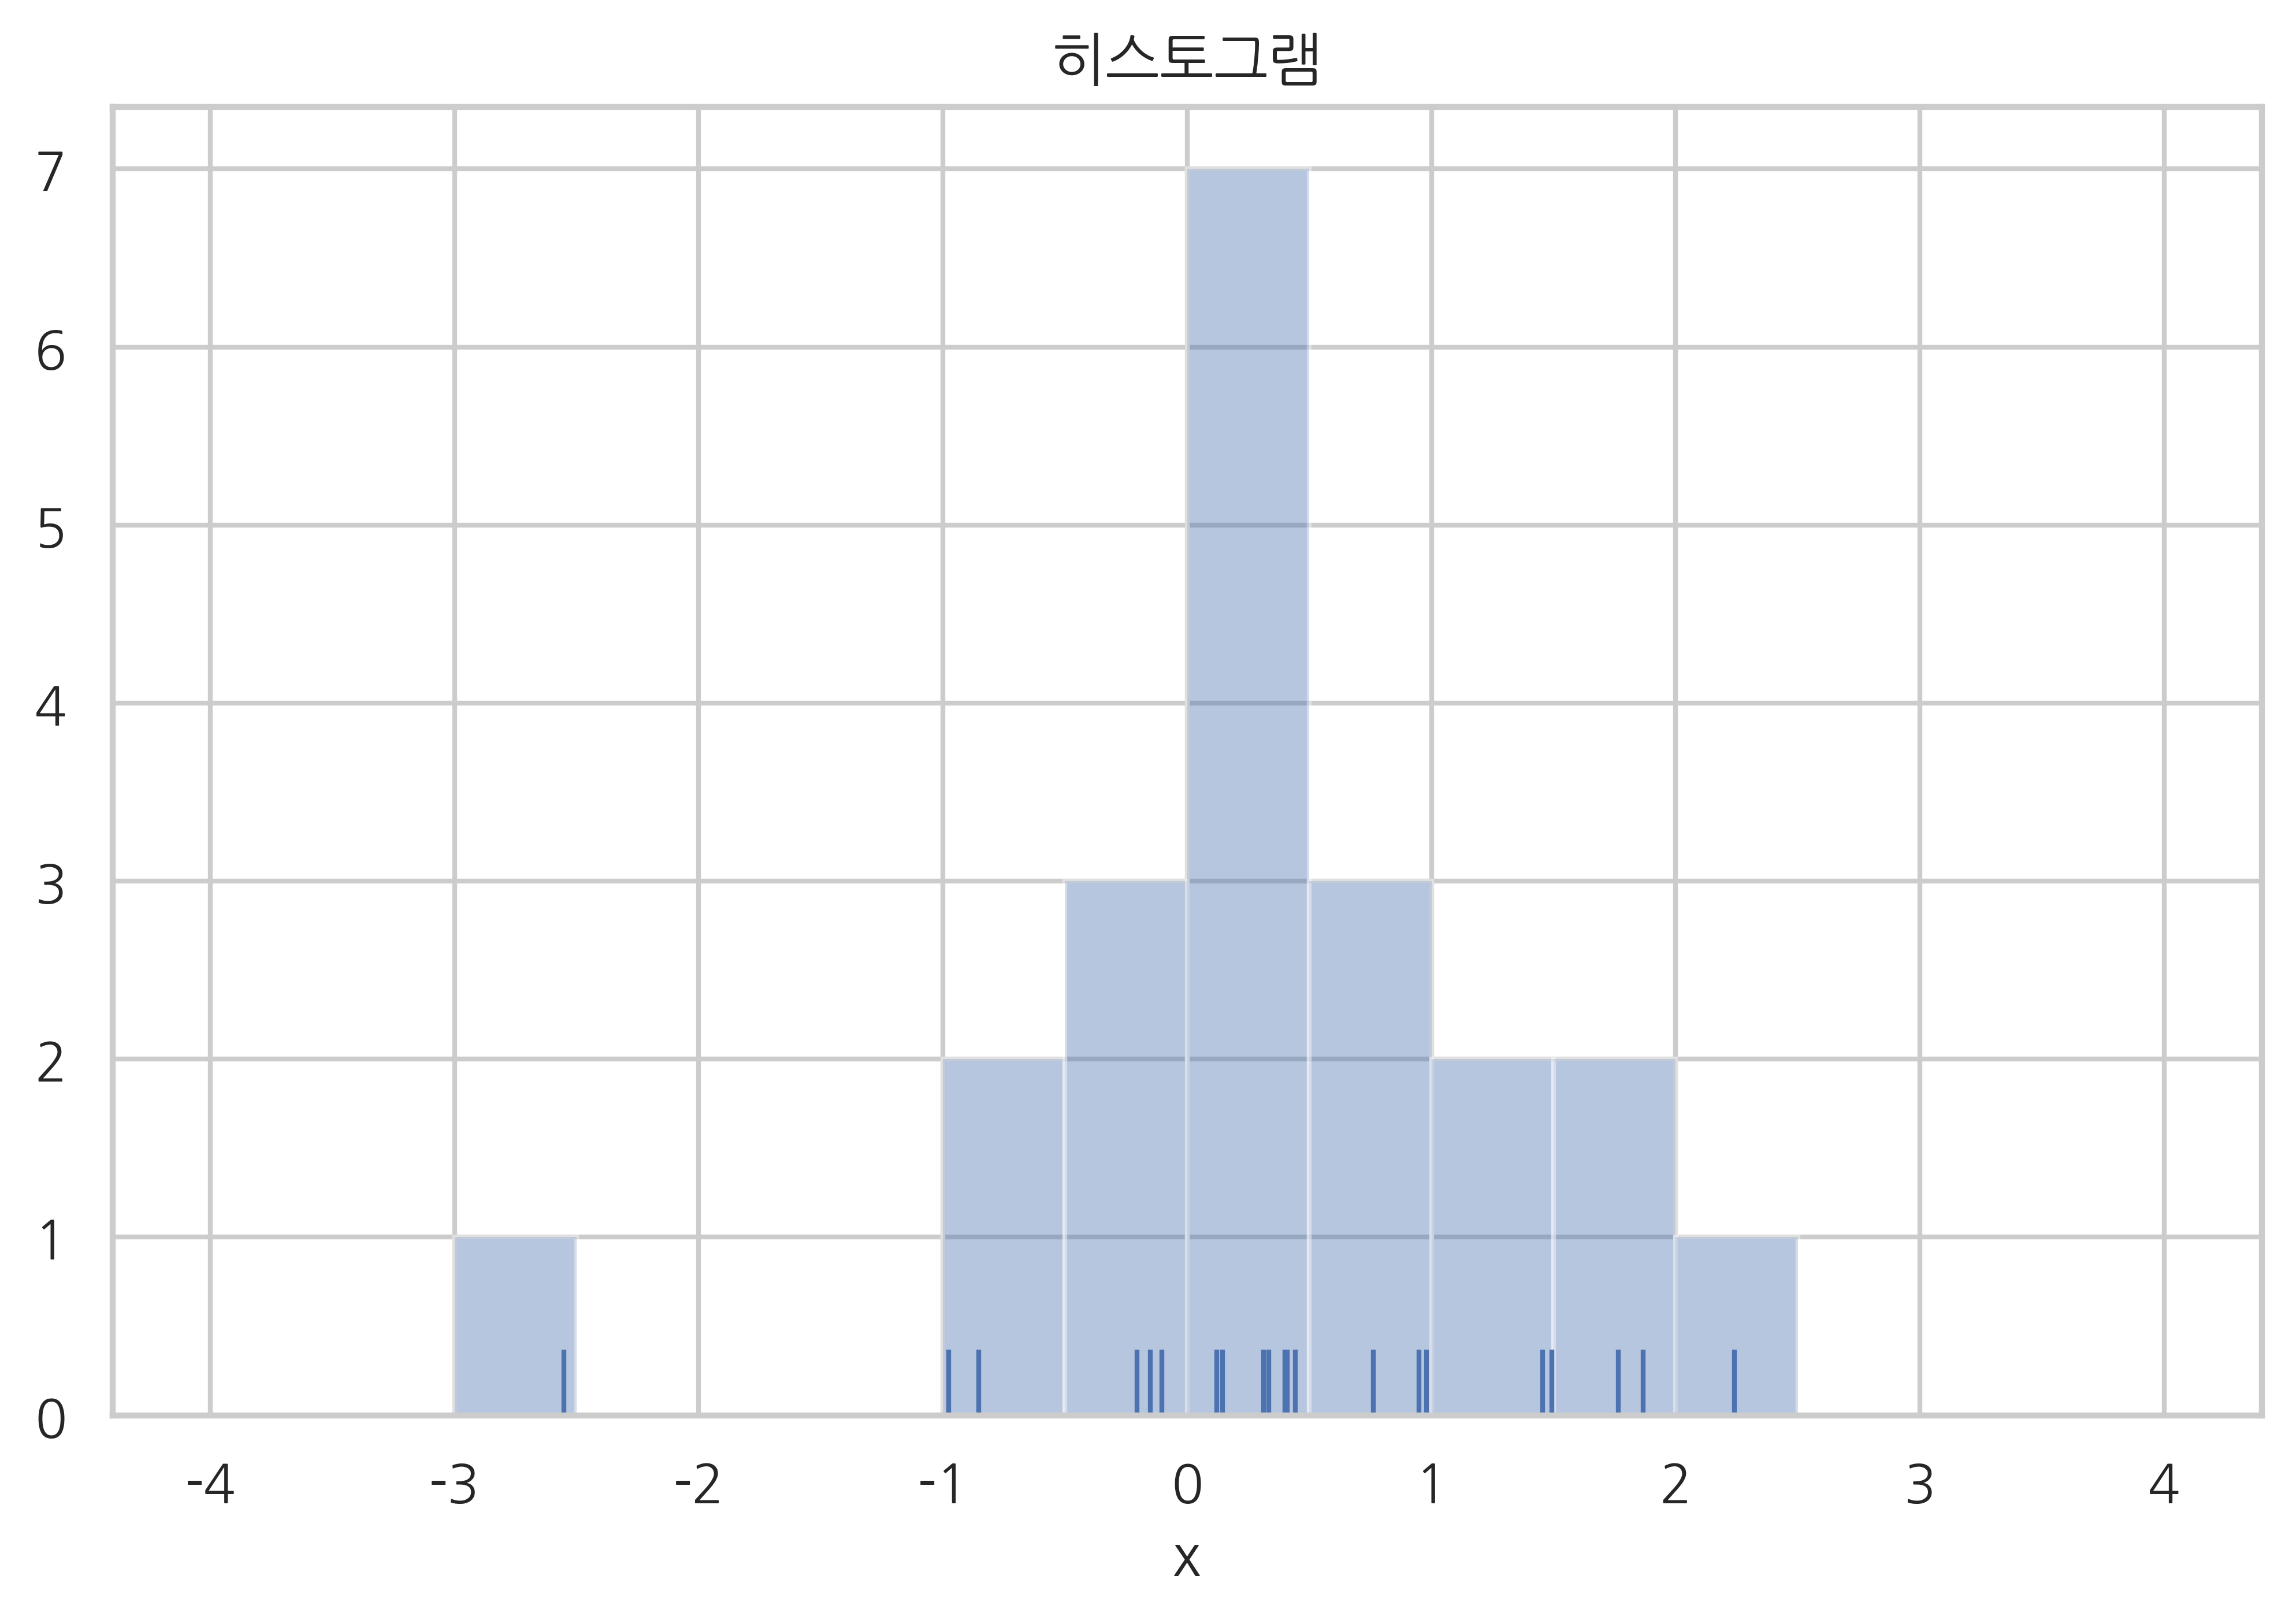

In [2]:
bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title('히스토그램')
plt.xlabel('x')
plt.show()

In [3]:
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print(f'최빈구간 = {bins[m_bin]} ~ {bins[m_bin + 1]}')

최빈구간 = 0.0 ~ 0.5


In [4]:
sp.random.seed(0)
x = sp.stats.norm(0, 2).rvs(1000)
# 평균 0, 표준편차 2인 정규분포 데이터 생성

In [5]:
np.mean(x)

-0.09051341498039077

In [6]:
np.var(x), np.std(x)
# 편향 표본분산, 표본표준편차

(3.896937825248617, 1.9740663173380515)

In [7]:
np.var(x, ddof=1), np.std(x, ddof=1)
# 비편향

(3.900838663912529, 1.9750540913890255)

In [8]:
sp.stats.skew(x)

0.03385895323565712

In [9]:
sp.stats.kurtosis(x)

-0.0467663244783294

In [10]:
sp.stats.moment(x, 1), sp.stats.moment(
    x, 2), sp.stats.moment(x, 3), sp.stats.moment(x, 4),

(0.0, 3.896937825248617, 0.2604706193725514, 44.84817401965371)

### 7.4 다변수 확률변수

결합확률질량함수

In [11]:
grades = ['A', 'B', 'C', 'D', 'E', 'F']
scores = pd.DataFrame([
    [1, 2, 1, 0, 0, 0],
    [0, 2, 3, 1, 0, 0],
    [0, 4, 7, 4, 1, 0],
    [0, 1, 4, 5, 4, 0],
    [0, 0, 1, 3, 2, 0],
    [0, 0, 0, 1, 2, 1]], columns=grades, index=grades)
scores.index.name = 'Y'
scores.columns.name = 'X'
scores

X  A  B  C  D  E  F
Y                  
A  1  2  1  0  0  0
B  0  2  3  1  0  0
C  0  4  7  4  1  0
D  0  1  4  5  4  0
E  0  0  1  3  2  0
F  0  0  0  1  2  1

In [12]:
# 결합확률질량함수
pmf = scores / scores.values.sum()
pmf

X     A     B     C     D     E     F
Y                                    
A  0.02  0.04  0.02  0.00  0.00  0.00
B  0.00  0.04  0.06  0.02  0.00  0.00
C  0.00  0.08  0.14  0.08  0.02  0.00
D  0.00  0.02  0.08  0.10  0.08  0.00
E  0.00  0.00  0.02  0.06  0.04  0.00
F  0.00  0.00  0.00  0.02  0.04  0.02

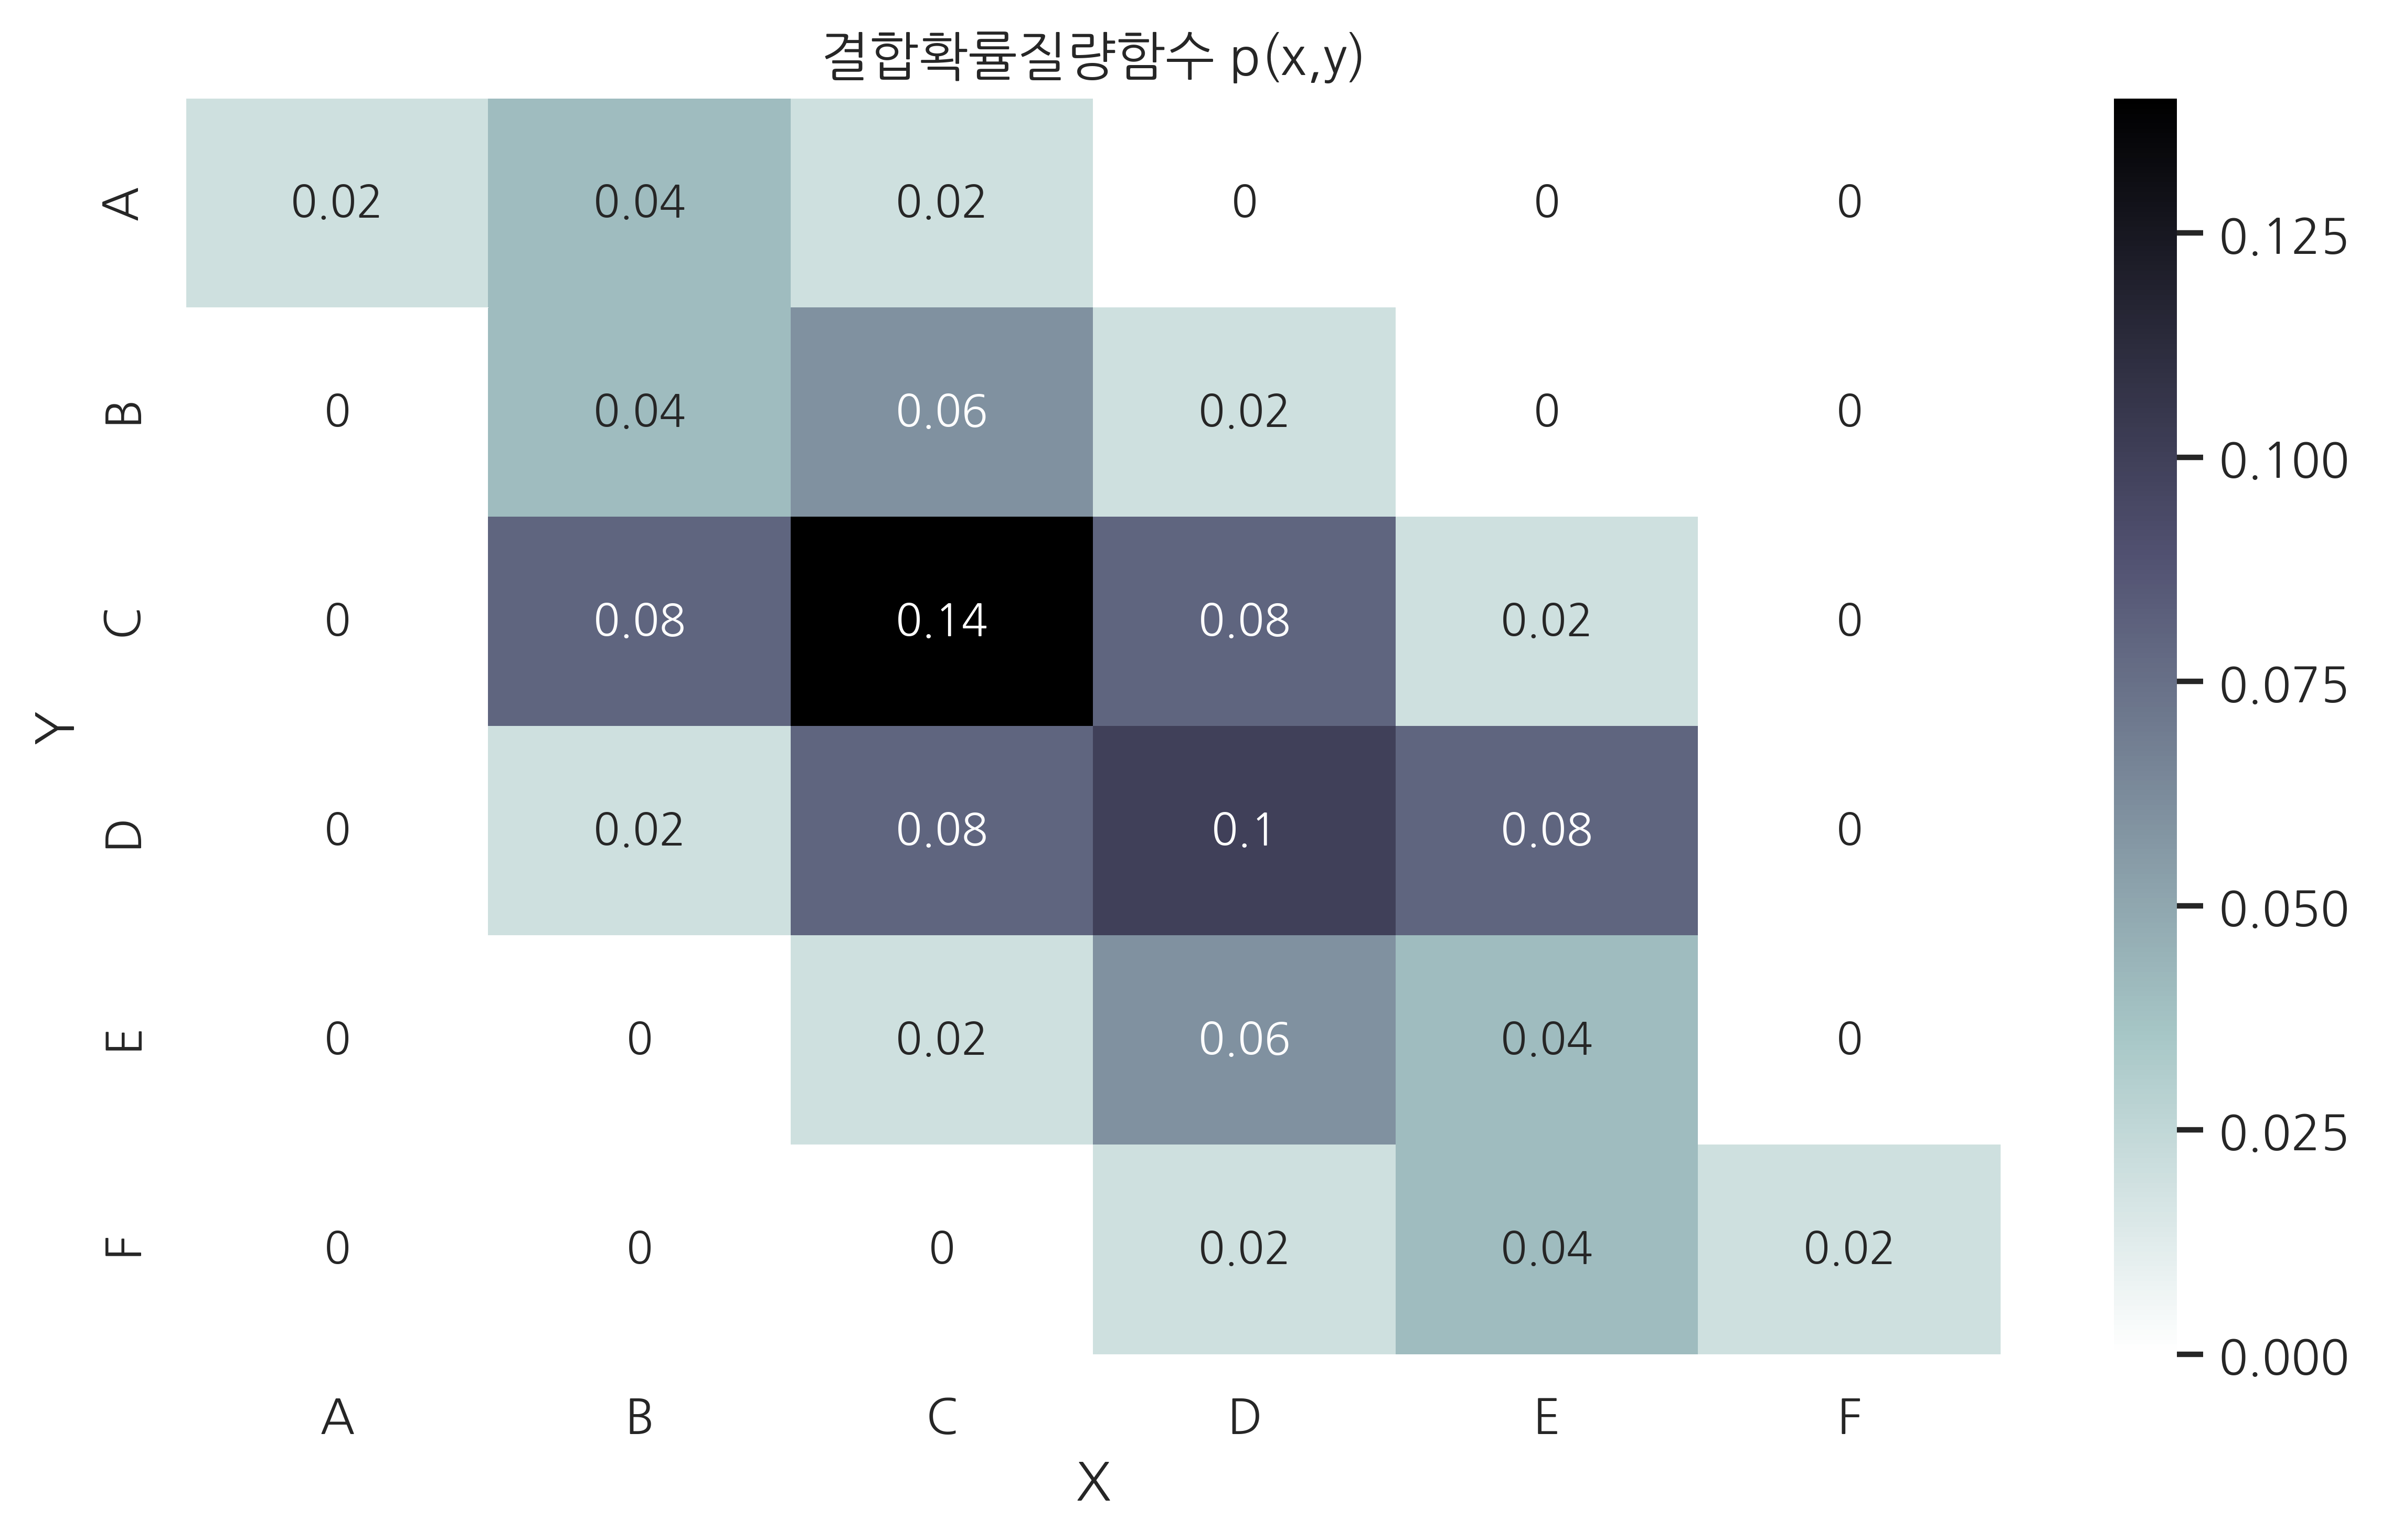

In [13]:
sns.heatmap(pmf, cmap=mpl.cm.bone_r, annot=True,
            xticklabels=['A', 'B', 'C', 'D', 'E', 'F'],
            yticklabels=['A', 'B', 'C', 'D', 'E', 'F'])
plt.title('결합확률질량함수 p(x,y)')
plt.tight_layout()
plt.show()

In [14]:
# 주변확률질량함수
pmf_marginal_x = pmf.sum(axis=0)
pmf_marginal_x[:, ]

X
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

In [15]:
pmf_marginal_y = pmf.sum(axis=1)
pmf_marginal_y[:, np.newaxis]

array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

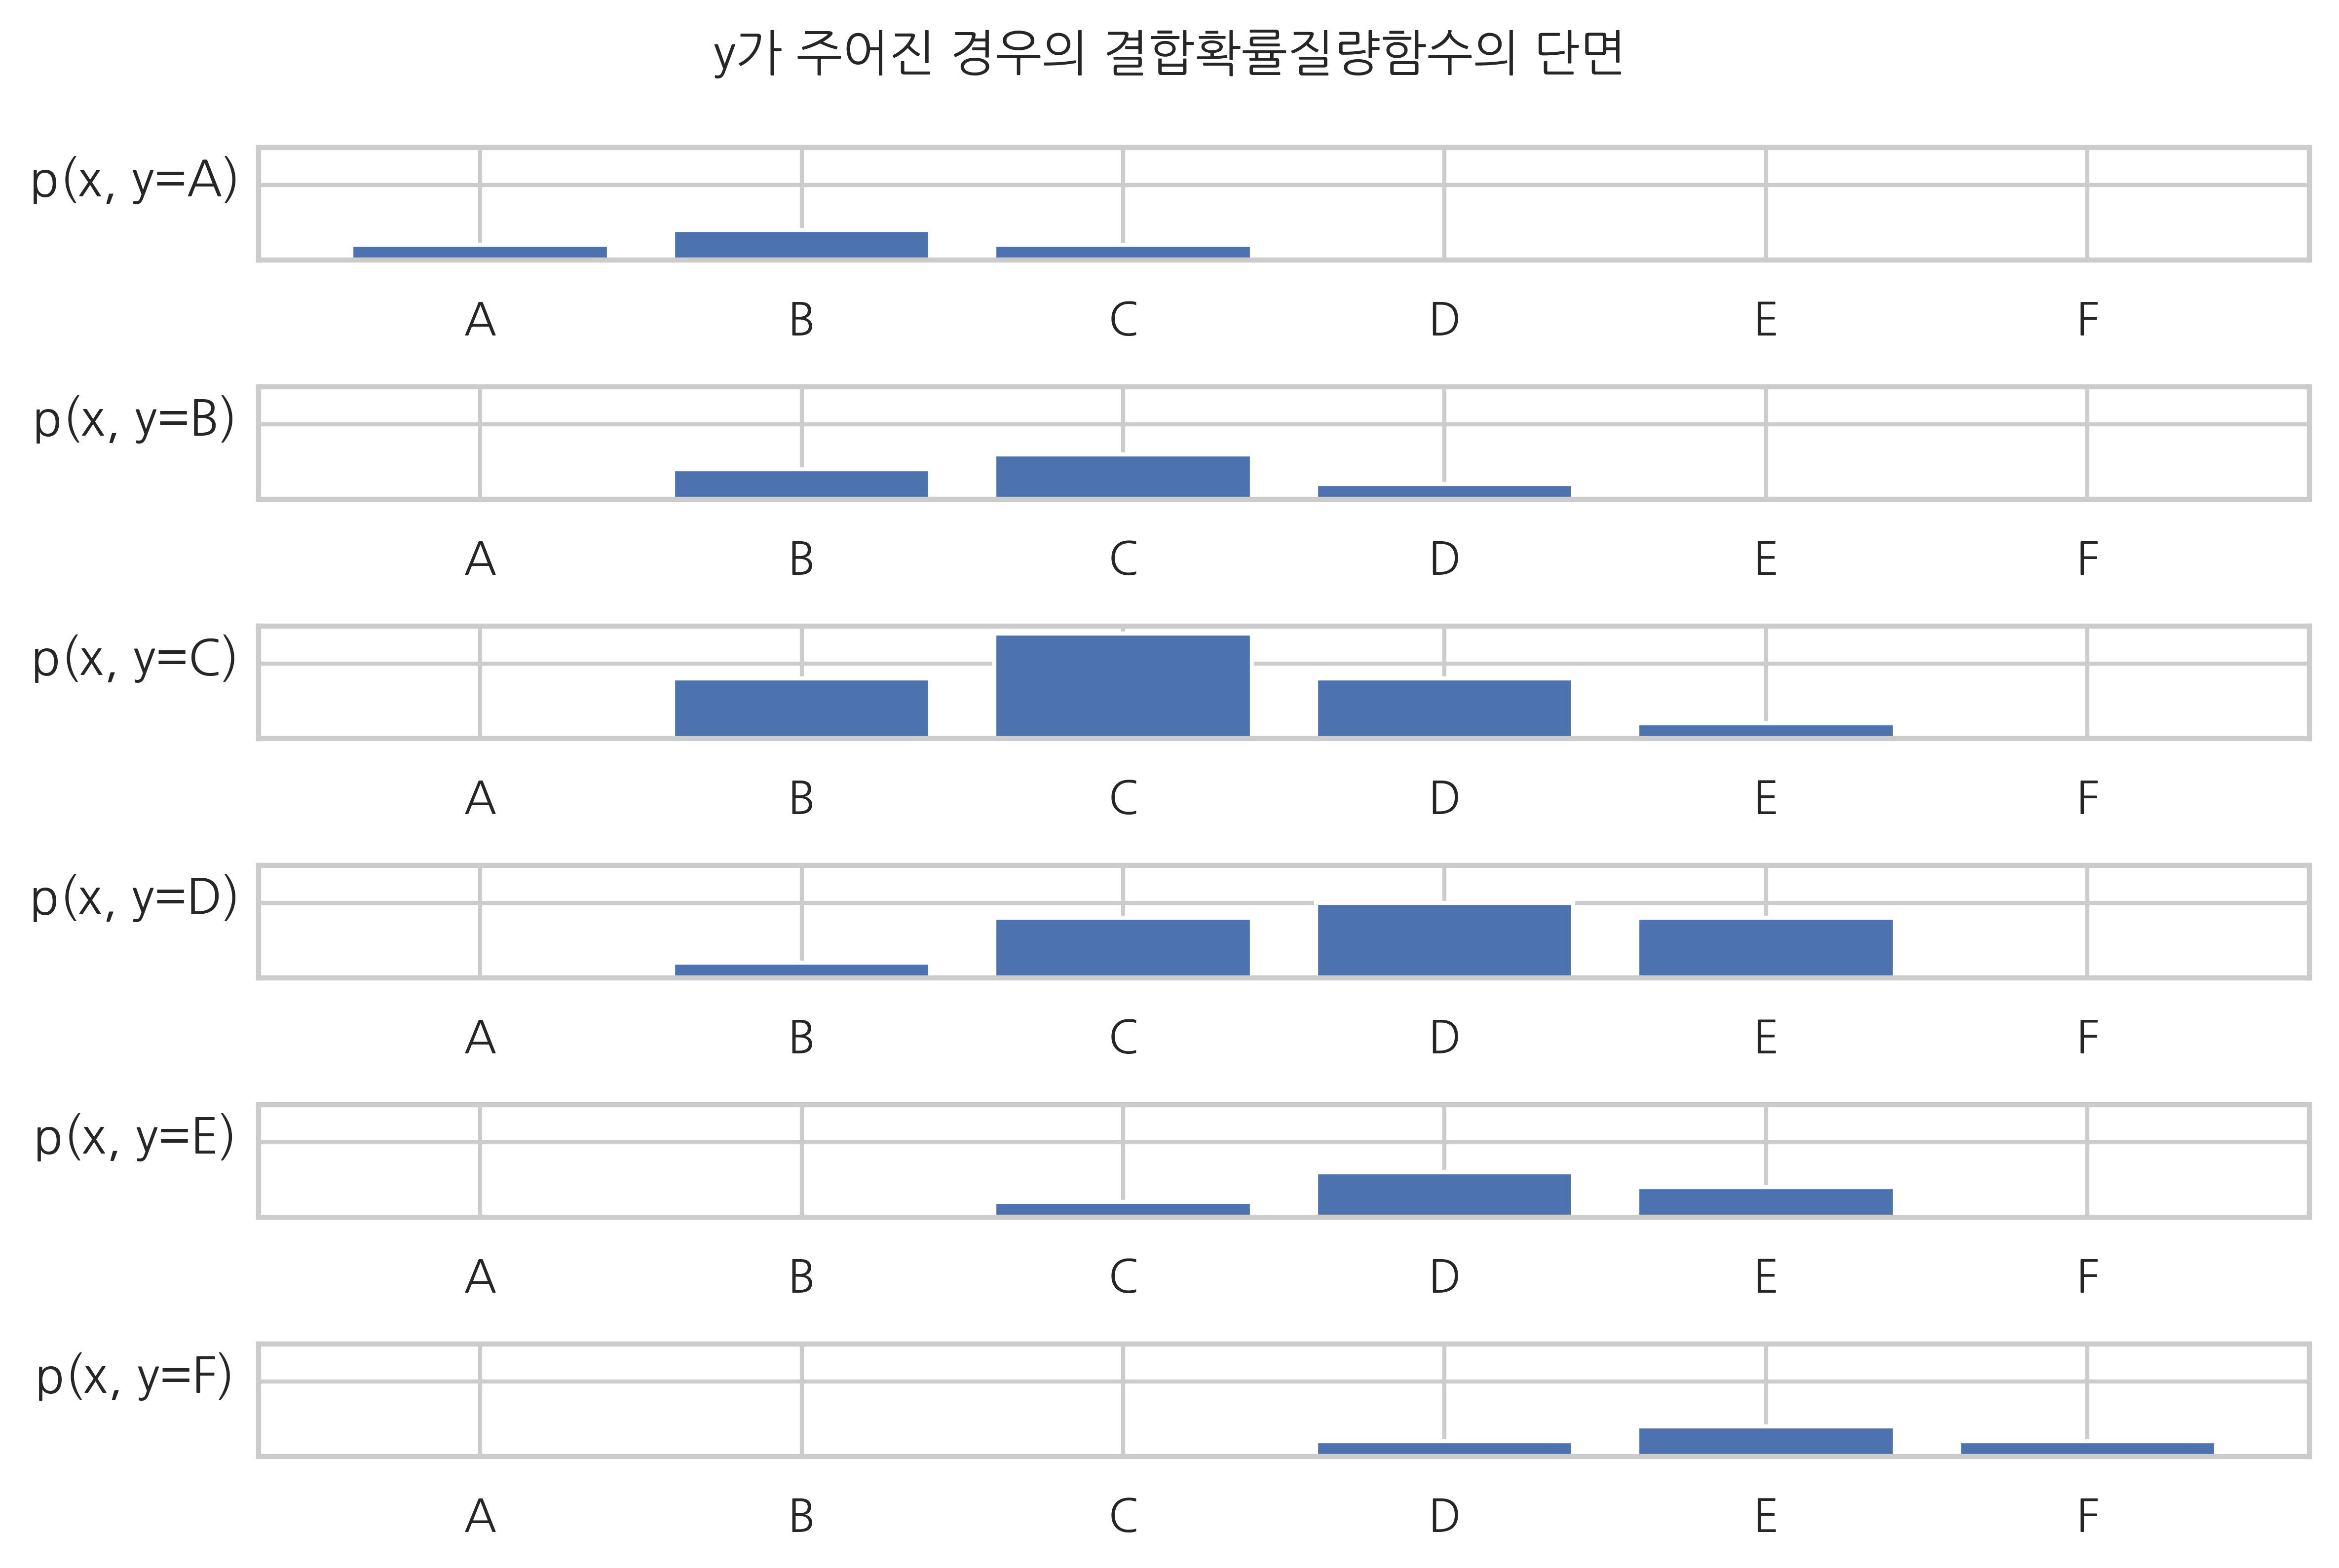

In [16]:
# 조건부확률질량삼후
import string
x = np.arange(6)
for i, y in enumerate(string.ascii_uppercase[:6]):
    ax = plt.subplot(6, 1, i+1)
    ax.tick_params(labelleft=False)
    plt.bar(x, pmf.iloc[i, :])
    plt.ylabel(f'p(x, y={y})', rotation=0, labelpad=30)
    plt.ylim(0, 0.15)
    plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.suptitle('y가 주어진 경우의 결합확률질량함수의 단면', y=1.05)
plt.tight_layout()
plt.show()

In [17]:
# y=A일 때 결합확률질량함수의 단면과 확률의 합
pmf.iloc[0, :]

X
A    0.02
B    0.04
C    0.02
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

In [18]:
np.sum(pmf.iloc[0, :])

0.08

In [19]:
# y=A일 때 조건부확률질량함수와 확률의 합
cond_y0 = pmf.iloc[0, :] / pmf_marginal_y[0]
cond_y0

X
A    0.25
B    0.50
C    0.25
D    0.00
E    0.00
F    0.00
Name: A, dtype: float64

In [20]:
np.sum(cond_y0)

1.0

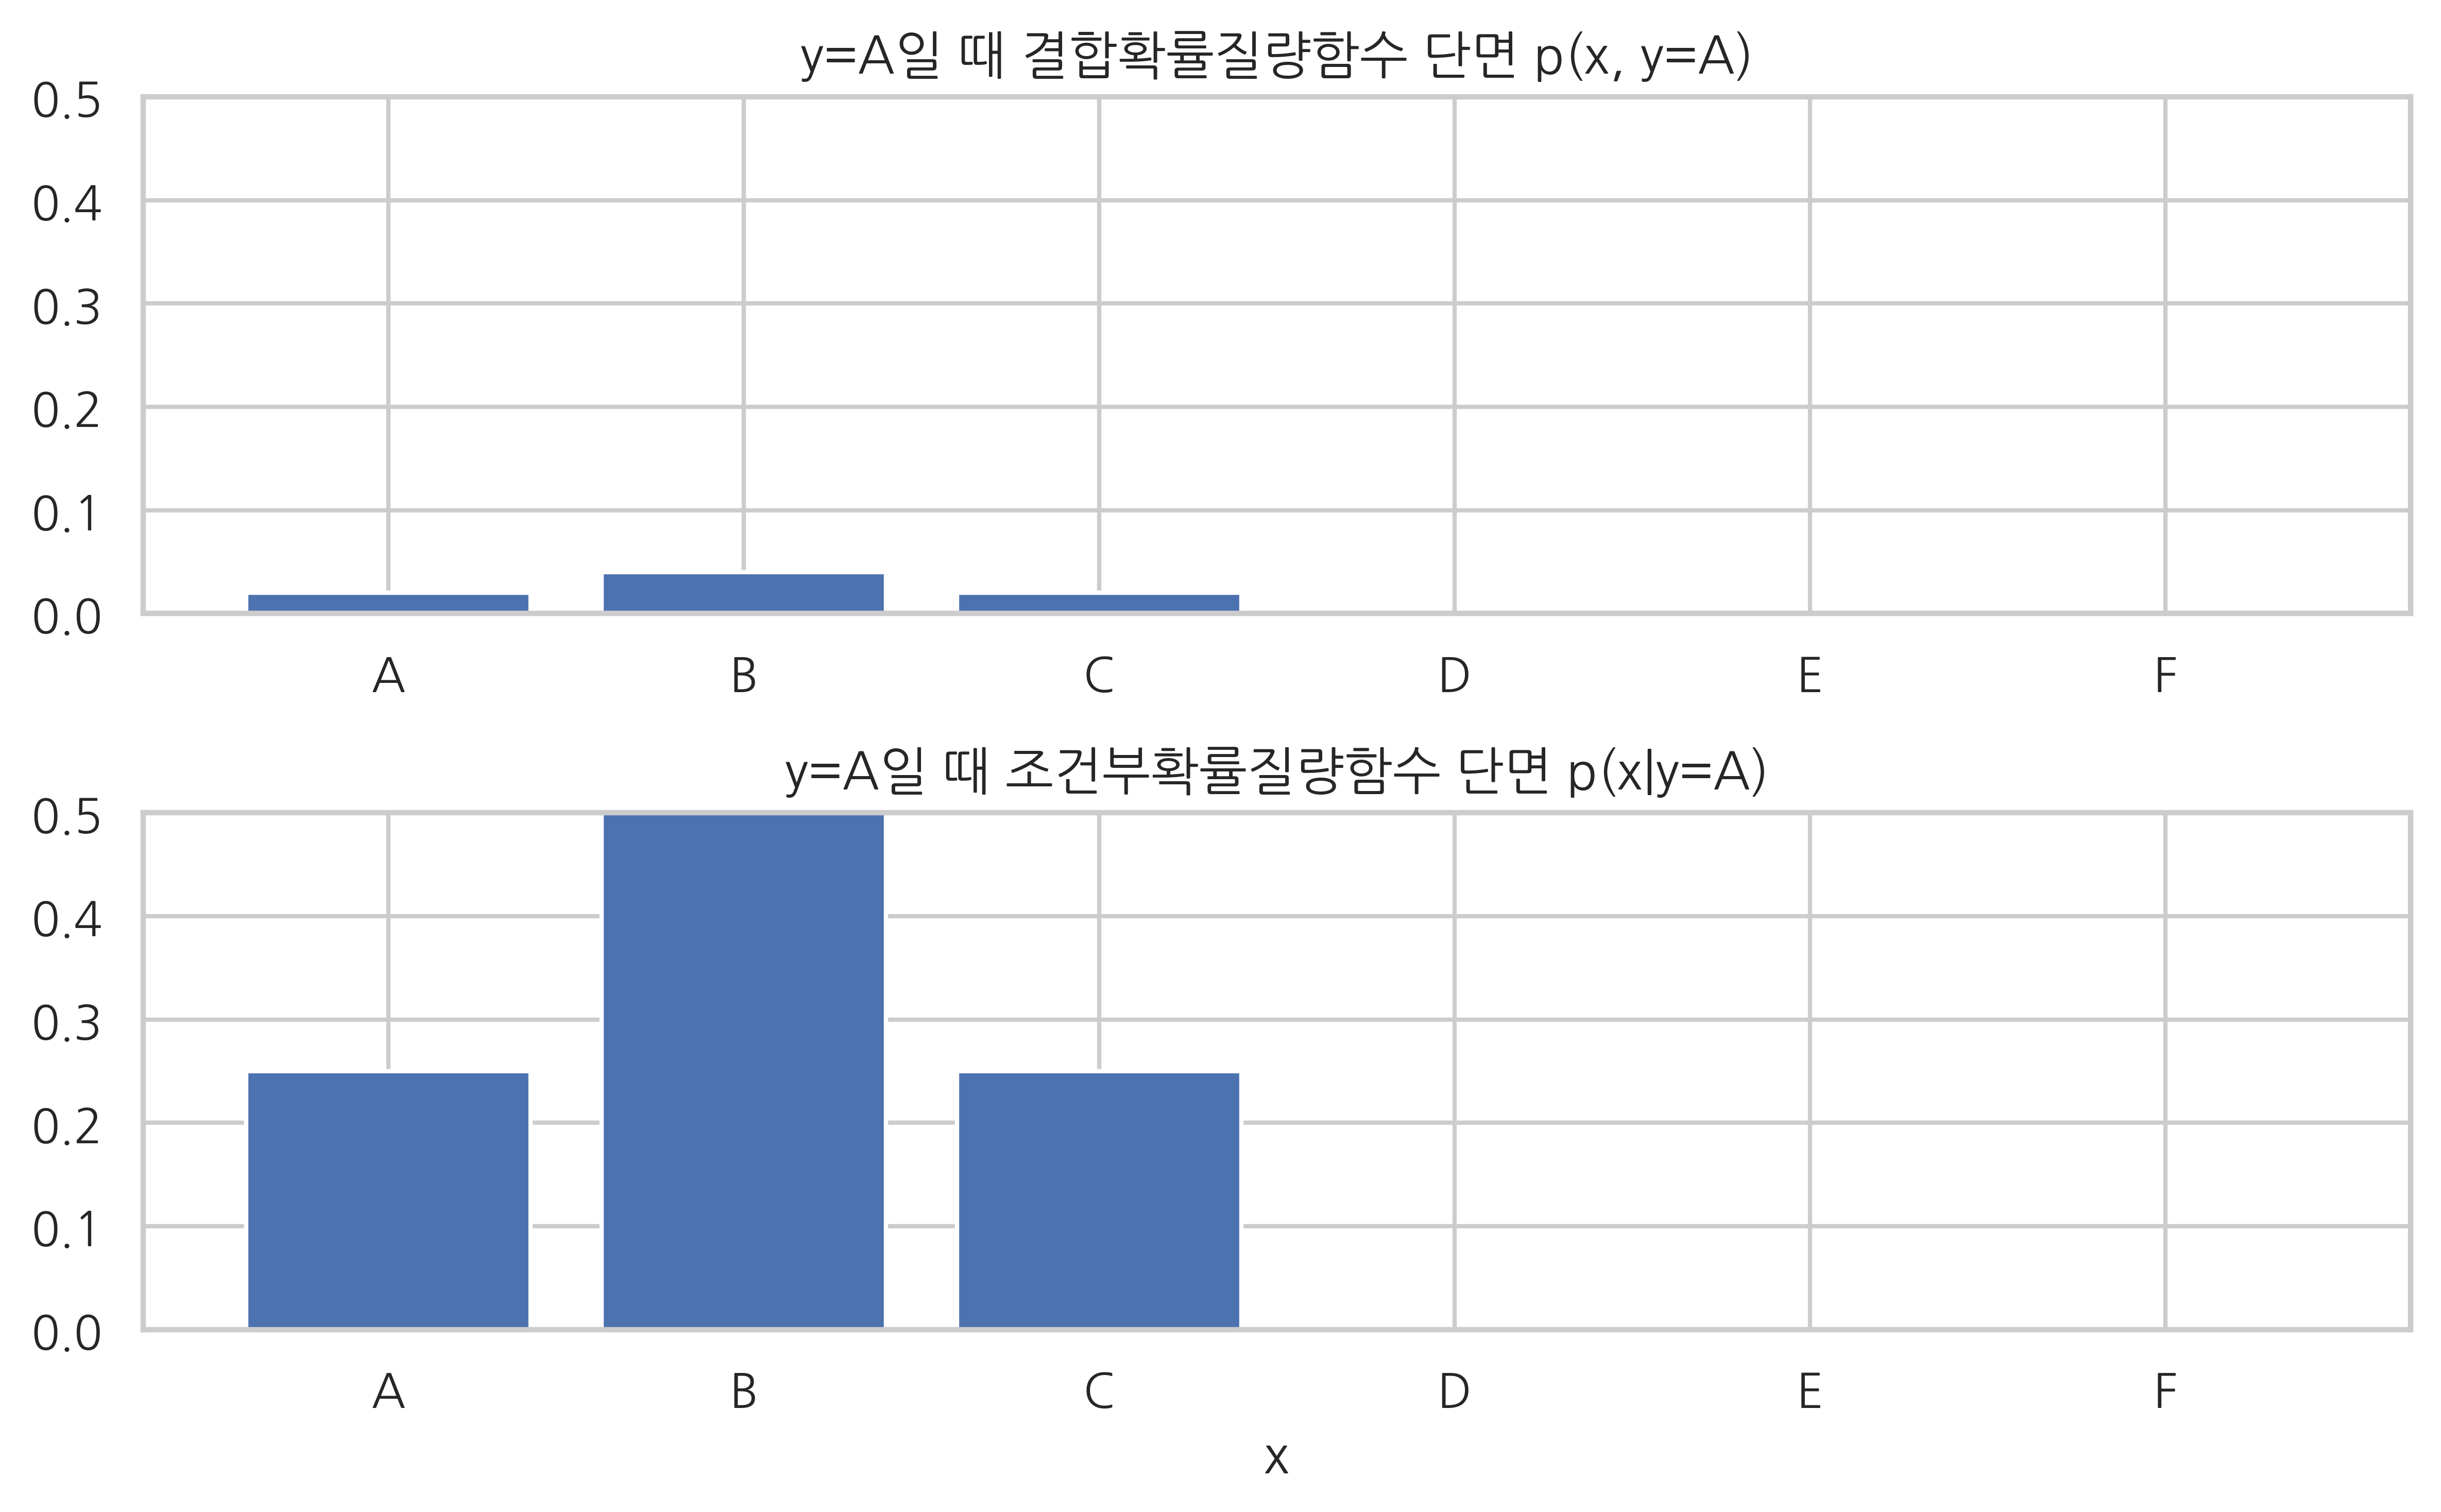

In [21]:
plt.subplot(211)
plt.bar(x, pmf.iloc[0, :])
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title('y=A일 때 결합확률질량함수 단면 p(x, y=A)')
plt.subplot(212)
plt.bar(x, cond_y0)
plt.ylim(0, 0.5)
plt.xticks(range(6), ['A', 'B', 'C', 'D', 'E', 'F'])
plt.title('y=A일 때 조건부확률질량함수 단면 p(x|y=A)')
plt.xlabel('x')
plt.tight_layout()
plt.show()

다변수 정규분포의 결합확률밀도

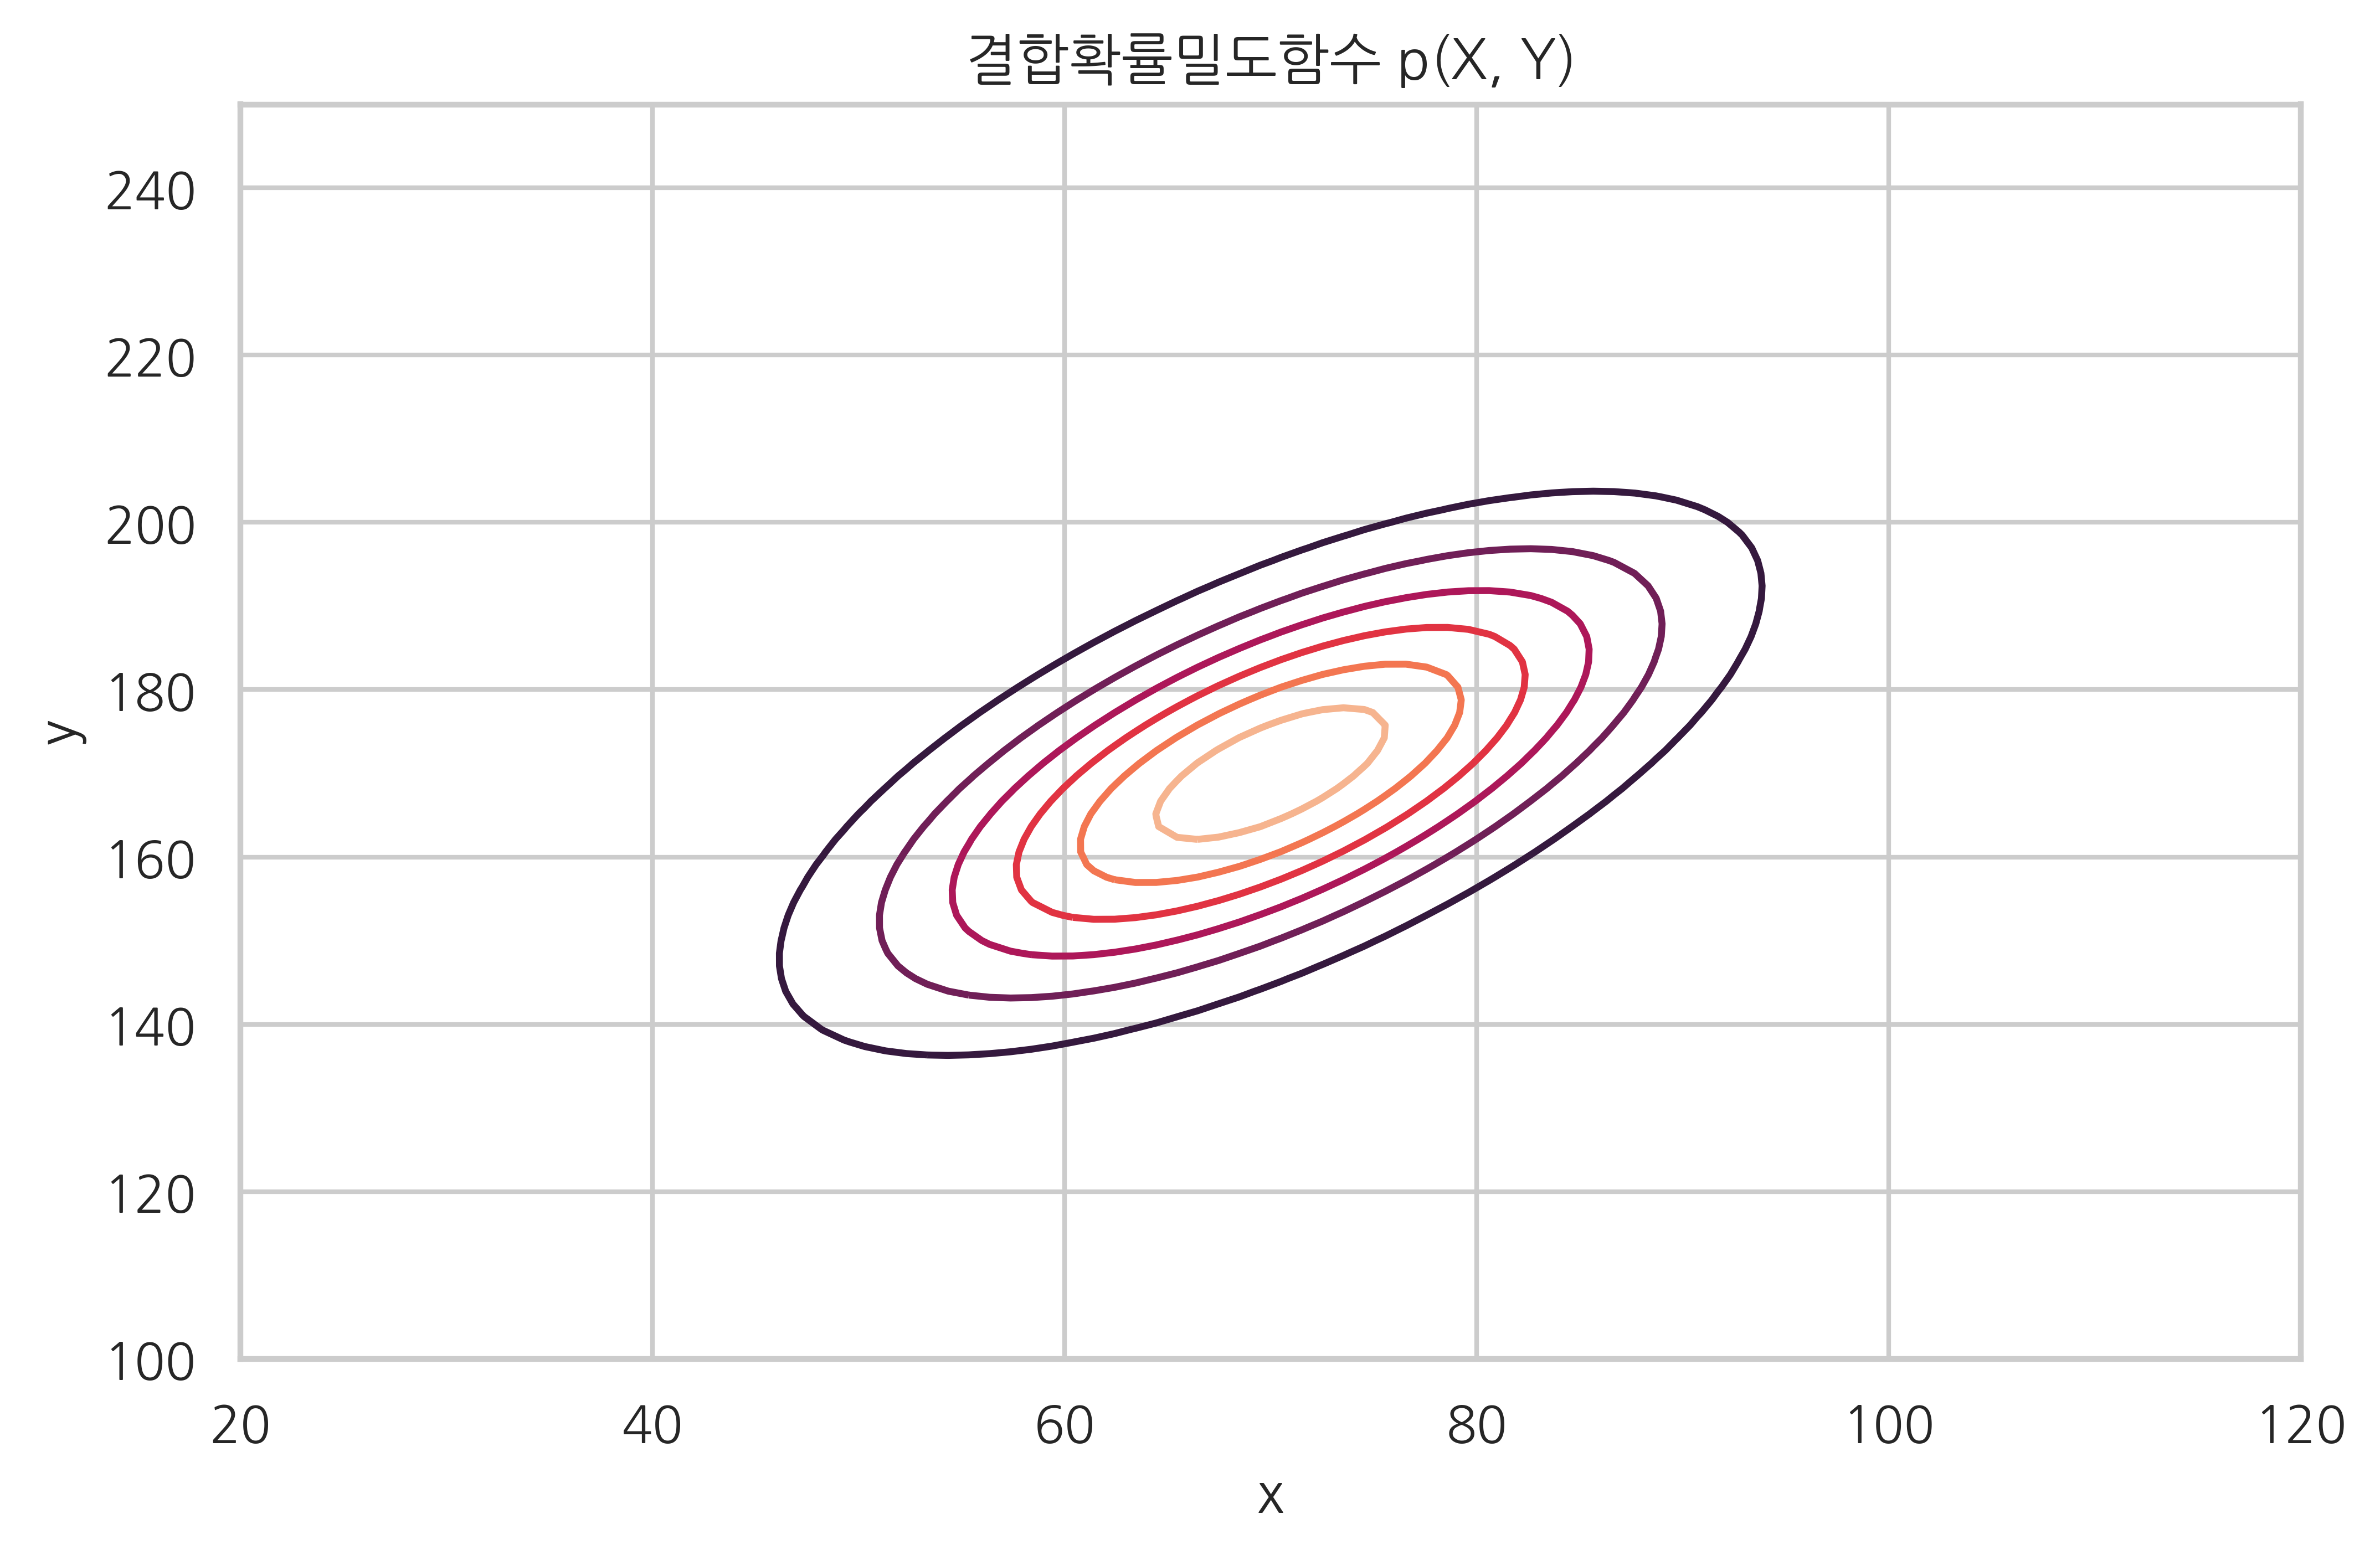

In [22]:
mu = [70, 170]
cov = [[150, 140], [140, 300]]
rv = sp.stats.multivariate_normal(mu, cov)

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

plt.contour(XX, YY, ZZ)
plt.xlabel('x')
plt.ylabel('y')
plt.title('결합확률밀도함수 p(X, Y)')
plt.show()

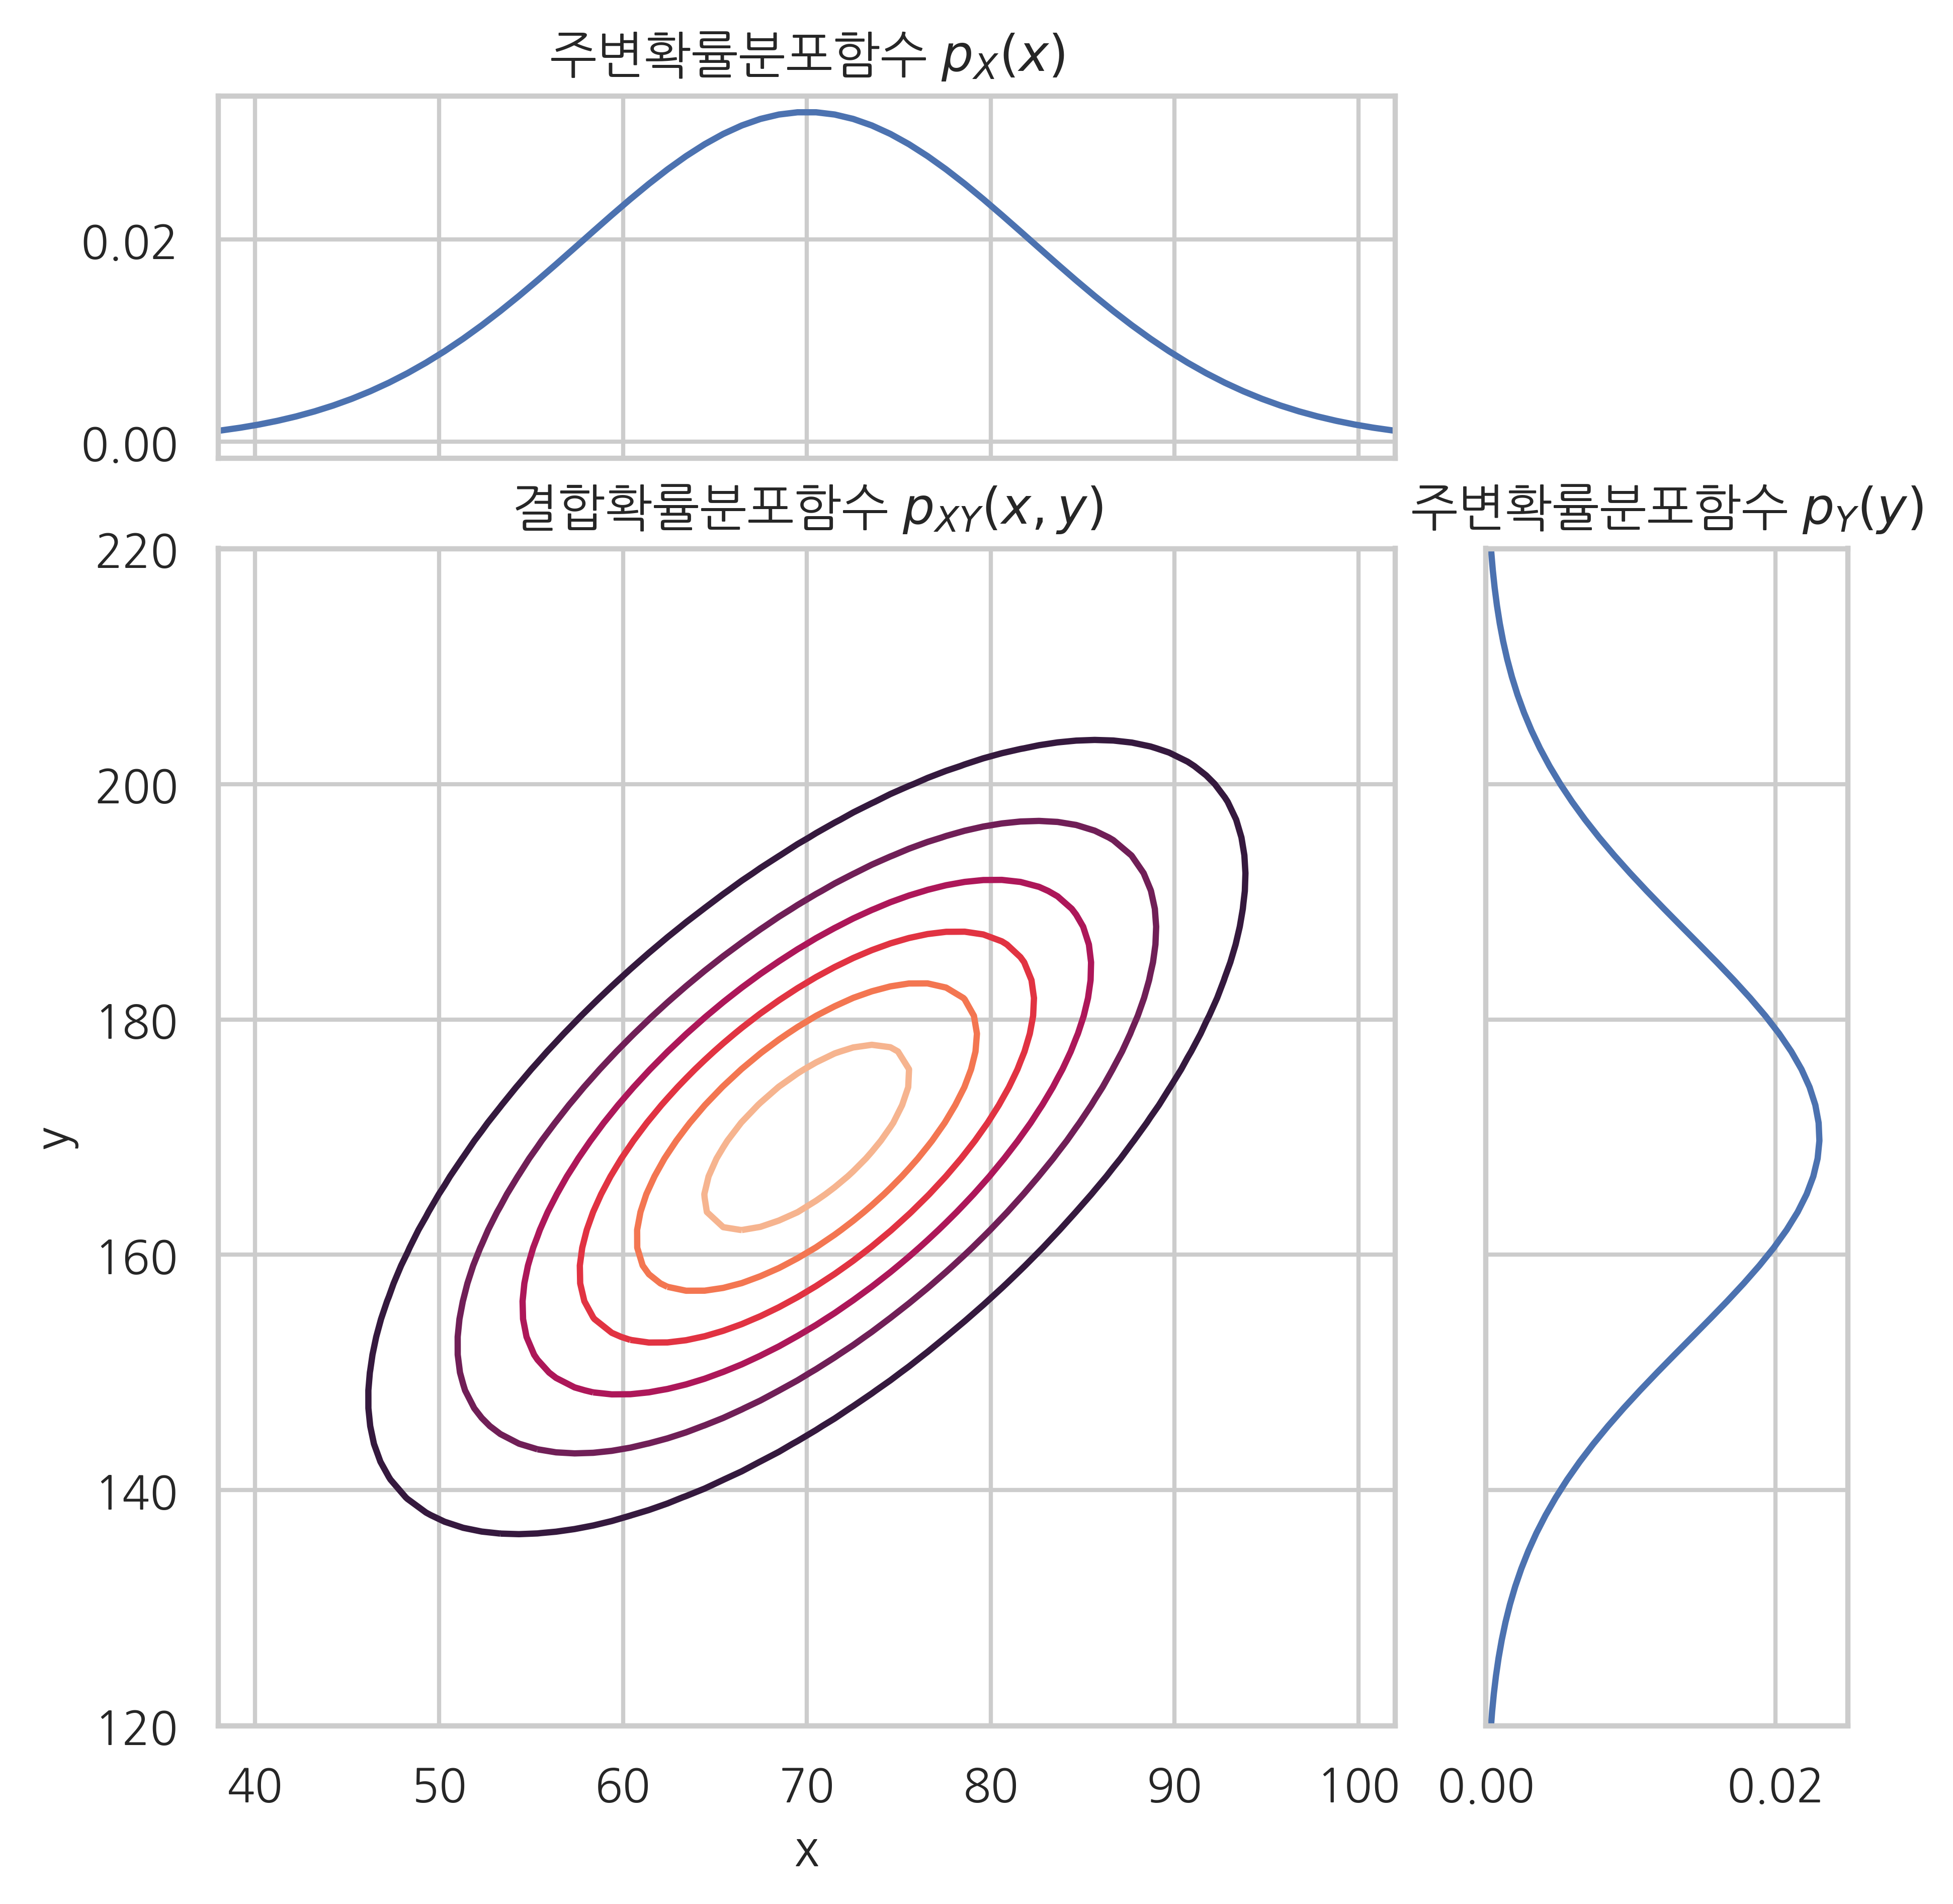

In [23]:
# 주변확률밀도
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps


xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 100)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
fx = [simps(Z, yy) for Z in ZZ.T]
fy = [simps(Z, xx) for Z in ZZ]

plt.figure(figsize=(6, 6))

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h  = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.yaxis.set_major_formatter(NullFormatter())

ax1.contour(XX, YY, ZZ)
ax1.set_title('결합확률분포함수 $p_{XY}(x, y)$')
ax1.set_xlabel('x'); ax1.set_ylabel('y')

ax2.plot(xx, fx)
ax2.set_title('주변확률분포함수 $p_X(x)$')

base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-yy, fy, transform=rot+base)
plt.title('주변확률분포함수 $p_Y(y)$')

ax1.set_xlim(38, 102)
ax1.set_ylim(120, 220)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.025)
ax3.set_ylim(120, 220)
plt.show()

조건부 확률밀도함수(고정된 y값에 대한 확률밀도함수)

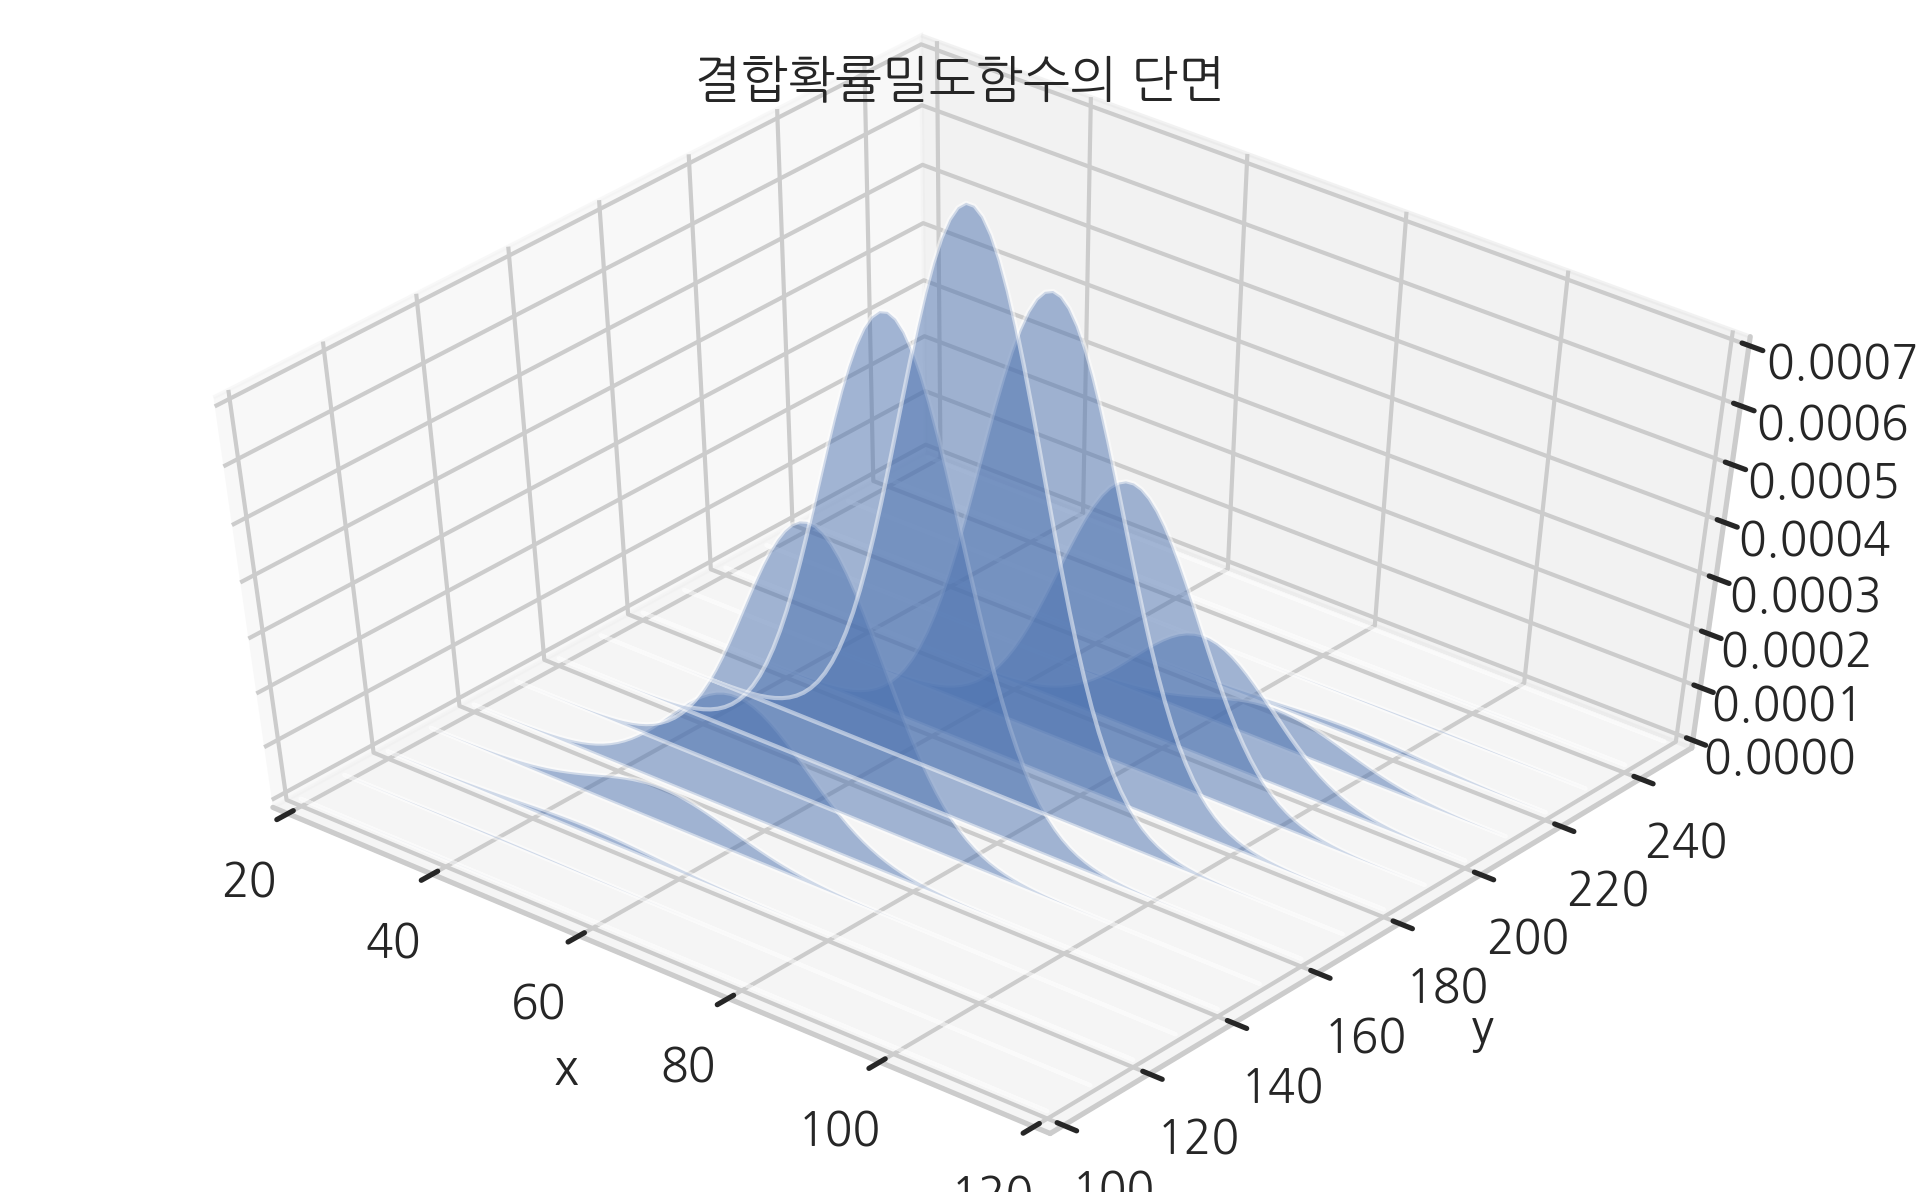

In [27]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0, xx, 0])
zs = np.zeros_like(xs)
verts = []
for i, y in enumerate(yy):
    zs[1:-1] = ZZ[i]
    verts.append(list(zip(xx, zs)))
poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=yy, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20, 120)
ax.set_ylim(100, 250)
ax.set_zlim3d(0, 0.0007)
ax.view_init(50, -50)
plt.title('결합확률밀도함수의 단면')
plt.show()

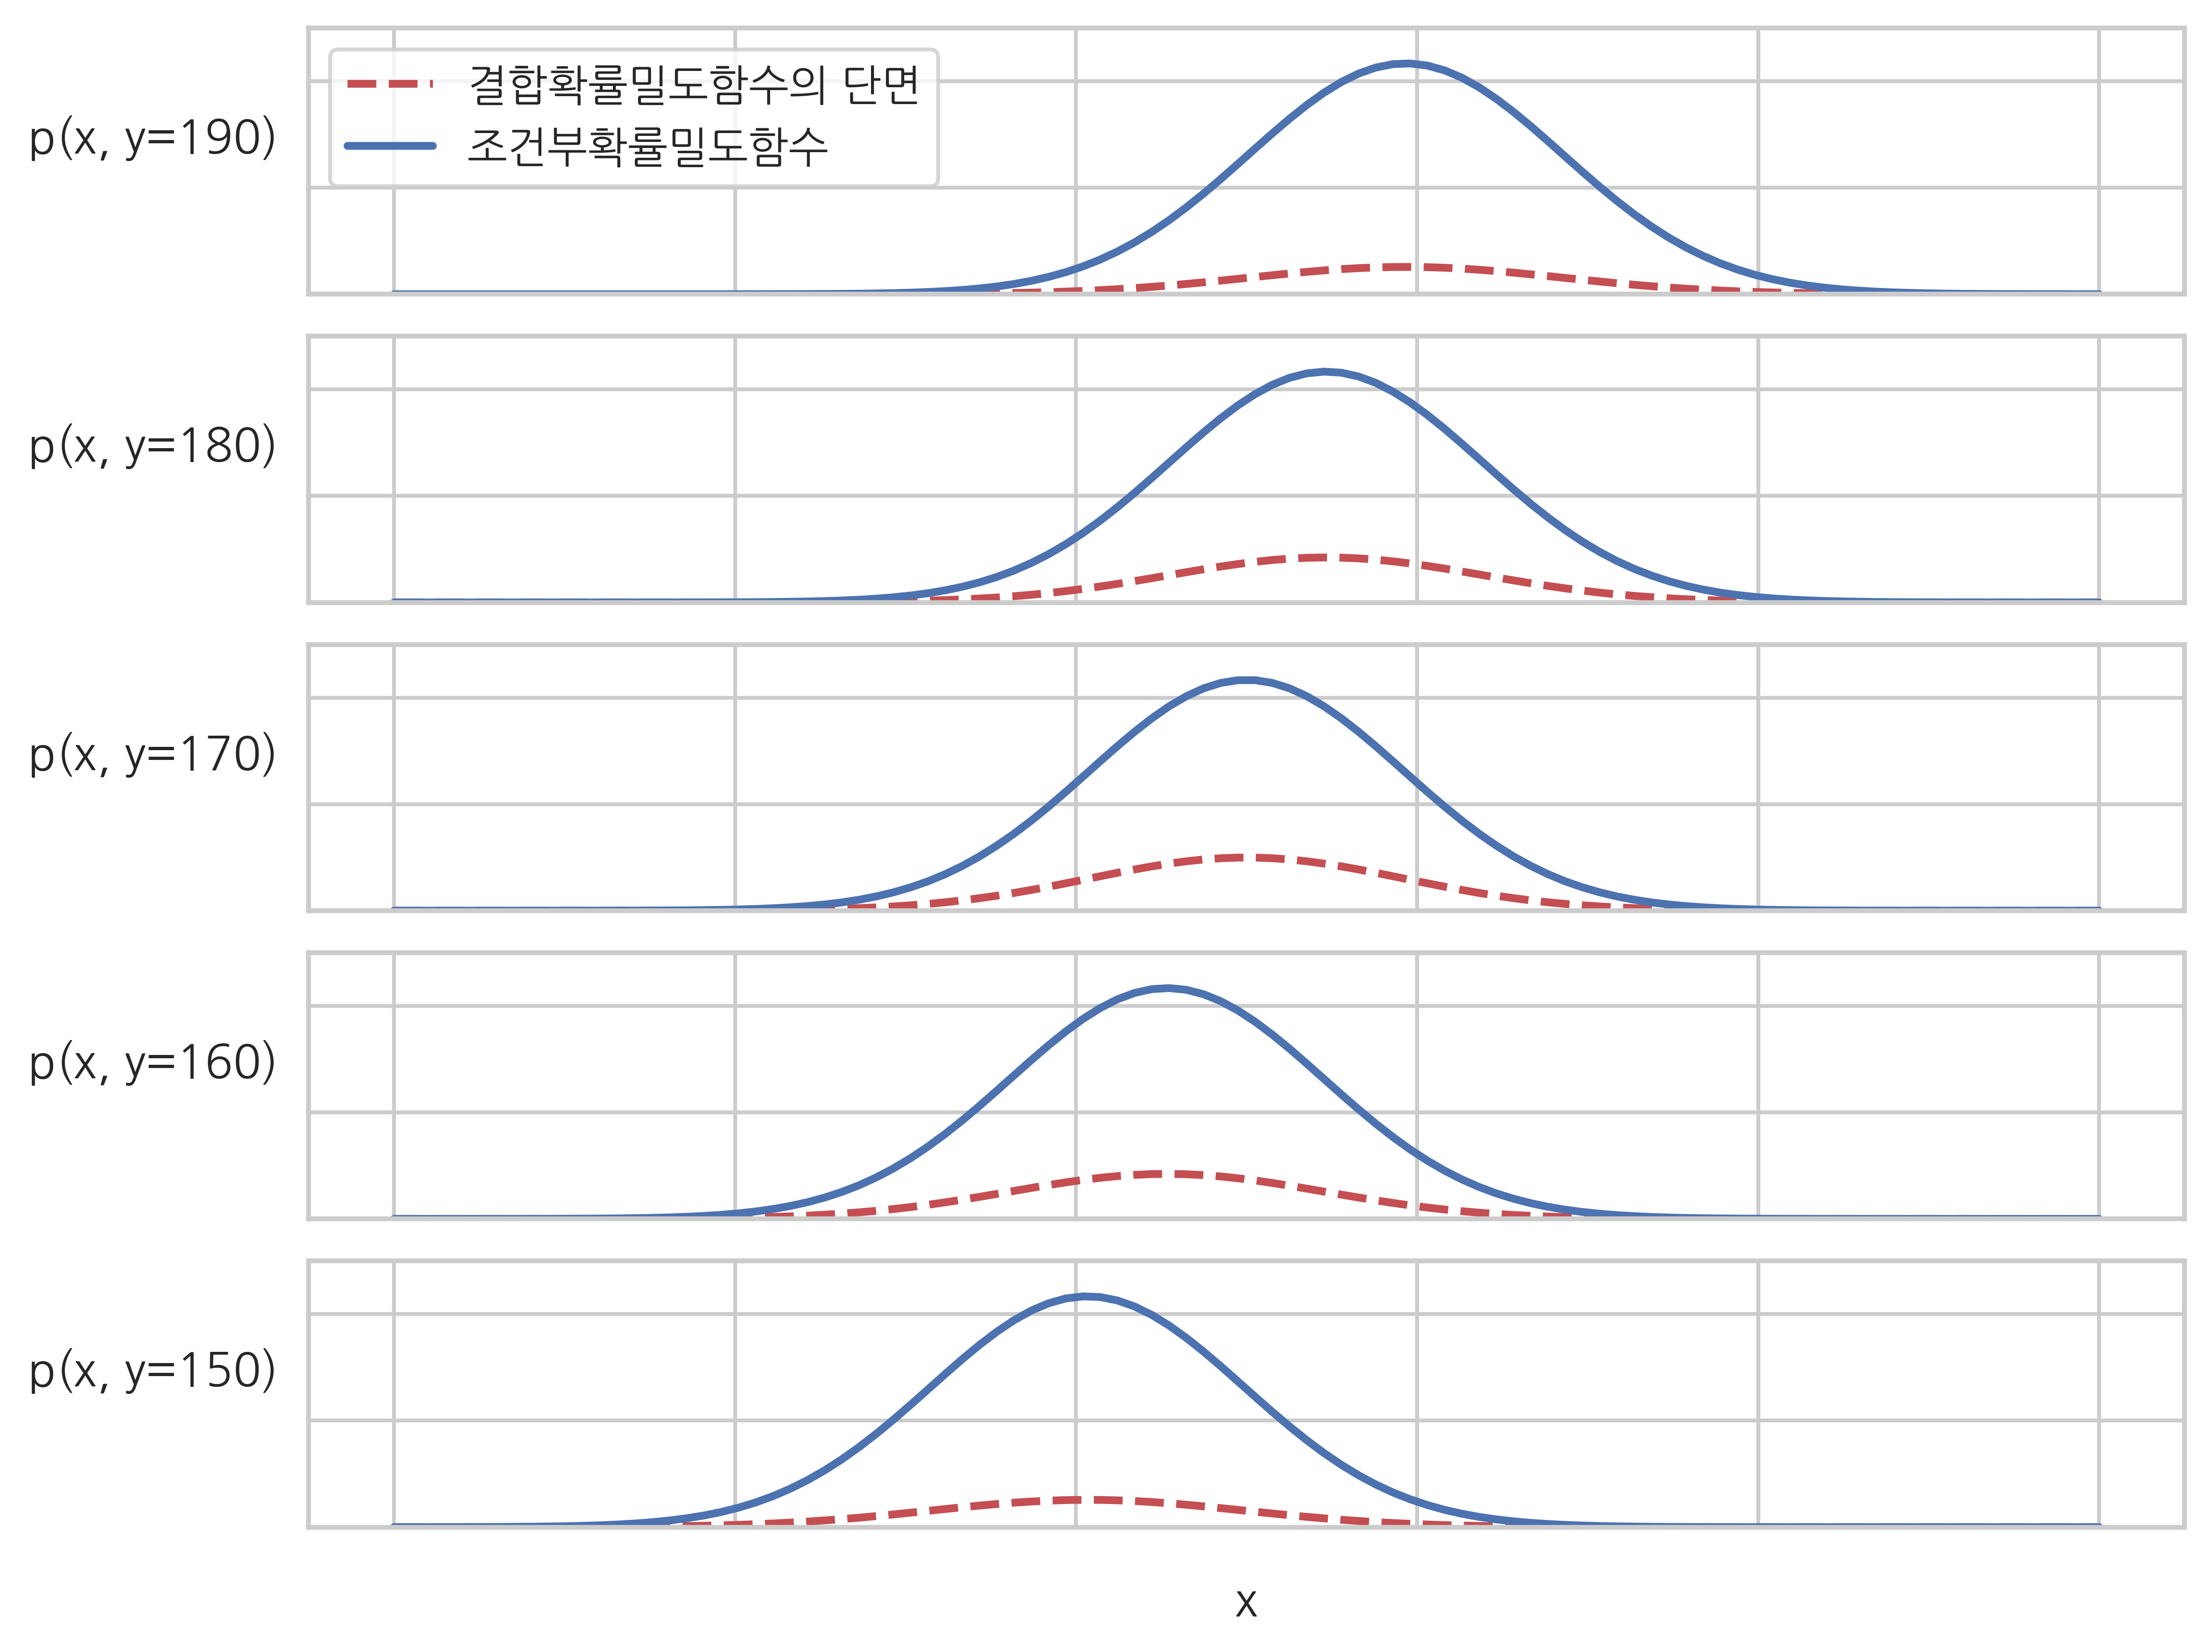

In [30]:
from scipy.integrate import simps
mag = 10
xx = np.linspace(20, 120, 100)
yy = np.linspace(100, 250, 16)
XX, YY = np.meshgrid(xx, yy)
ZZ = rv.pdf(np.dstack([XX, YY]))
plt.figure(figsize=(8, 6))
for i, j in enumerate(range(9, 4, -1)):
    ax = plt.subplot(5, 1, i + 1)
    ax.tick_params(labelleft=False)
    plt.plot(xx, ZZ[j, :] * mag, 'r--', lw=2, label='결합확률밀도함수의 단면')
    marginal = simps(ZZ[j, :], xx)
    plt.plot(xx, ZZ[j, :] / marginal,  'b-', lw=2, label='조건부확률밀도함수')
    plt.ylim(0, 0.05)
    ax.xaxis.set_ticklabels([])
    plt.ylabel('p(x, y={:.0f})'.format(yy[j]), rotation=0, labelpad=40)
    if i == 0:
        plt.legend(loc=2)
plt.xlabel('x')
plt.tight_layout()
plt.show()

반복시행
- 같은 확률변수에서 복수의 표본데이터를 취하는 경우
- 이 표본들은 서로 독립

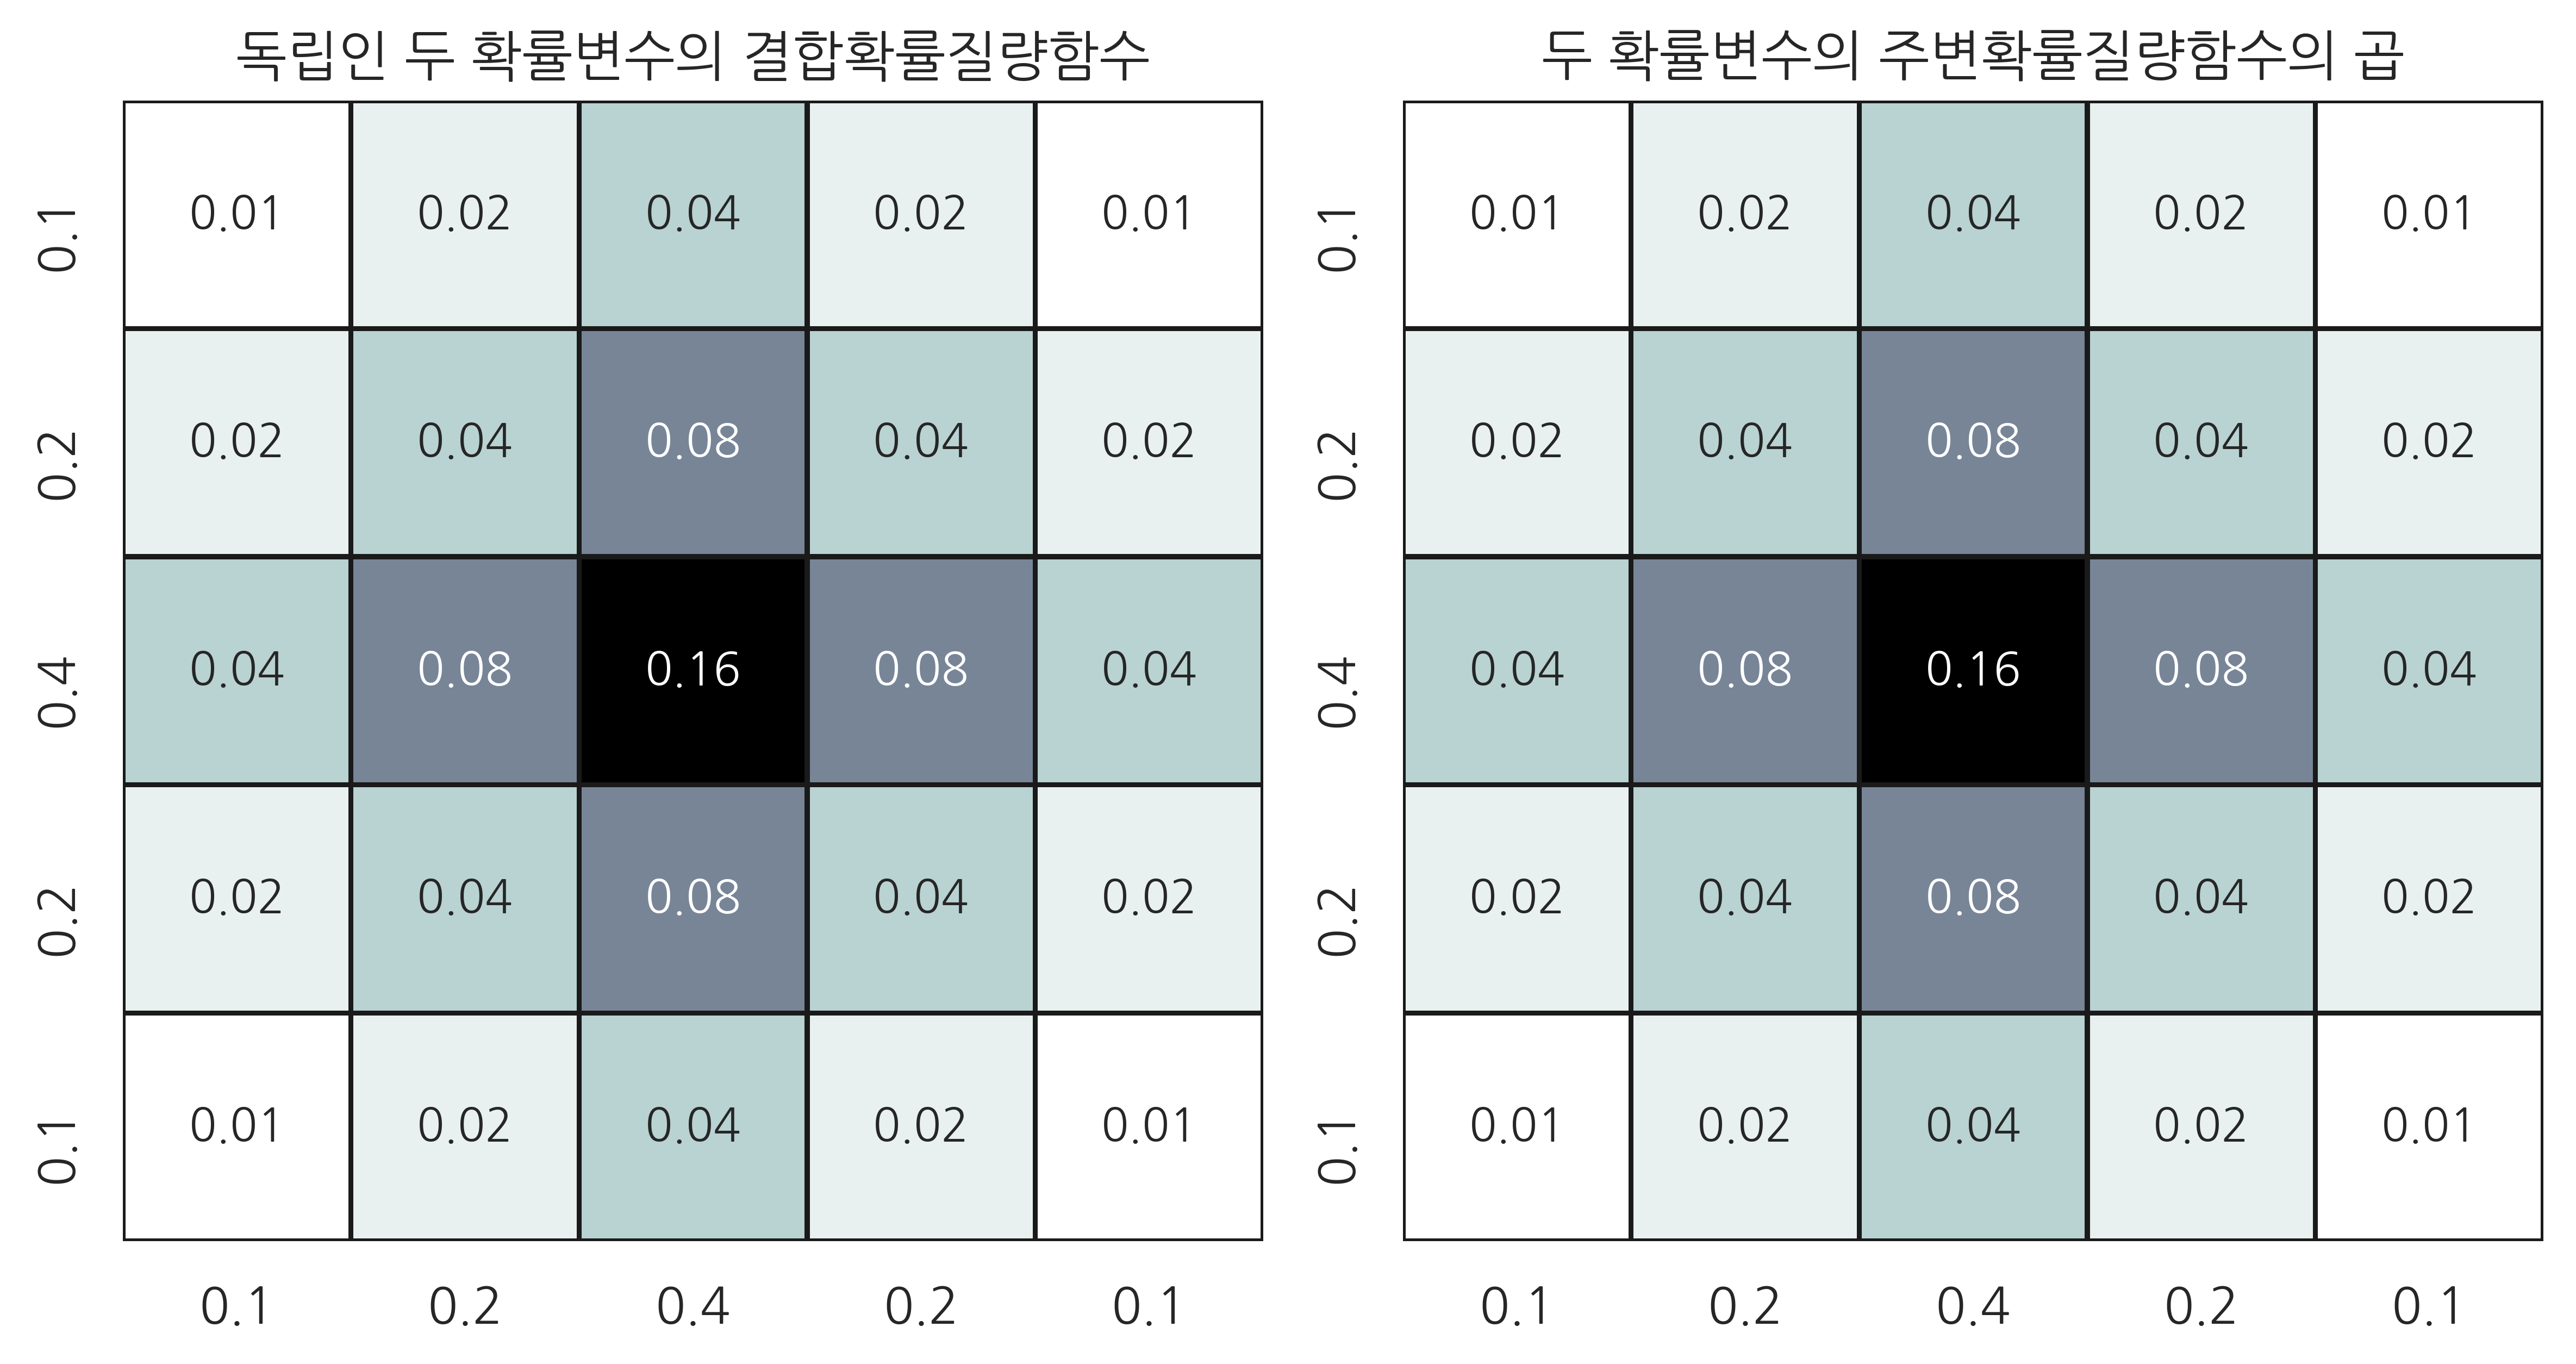

In [34]:
pmf1 = np.array([
    [1, 2, 4, 2, 1], 
    [2, 4, 8, 4, 2], 
    [4, 8, 16, 8, 4], 
    [2, 4, 8, 4, 2],
    [1, 2, 4, 2, 1]])
pmf1 = pmf1 / pmf1.sum()

pmf1_marginal_x = np.round(pmf1.sum(axis=0), 2)
pmf1_marginal_y = np.round(pmf1.sum(axis=1), 2)

plt.subplot(121)
sns.heatmap(pmf1, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor='k', cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title('독립인 두 확률변수의 결합확률질량함수')

plt.subplot(122)
pmf1x = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
sns.heatmap(pmf1x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor='k', cbar=False, xticklabels=pmf1_marginal_x, yticklabels=pmf1_marginal_y)
plt.title('두 확률변수의 주변확률질량함수의 곱')

plt.tight_layout()
plt.show()

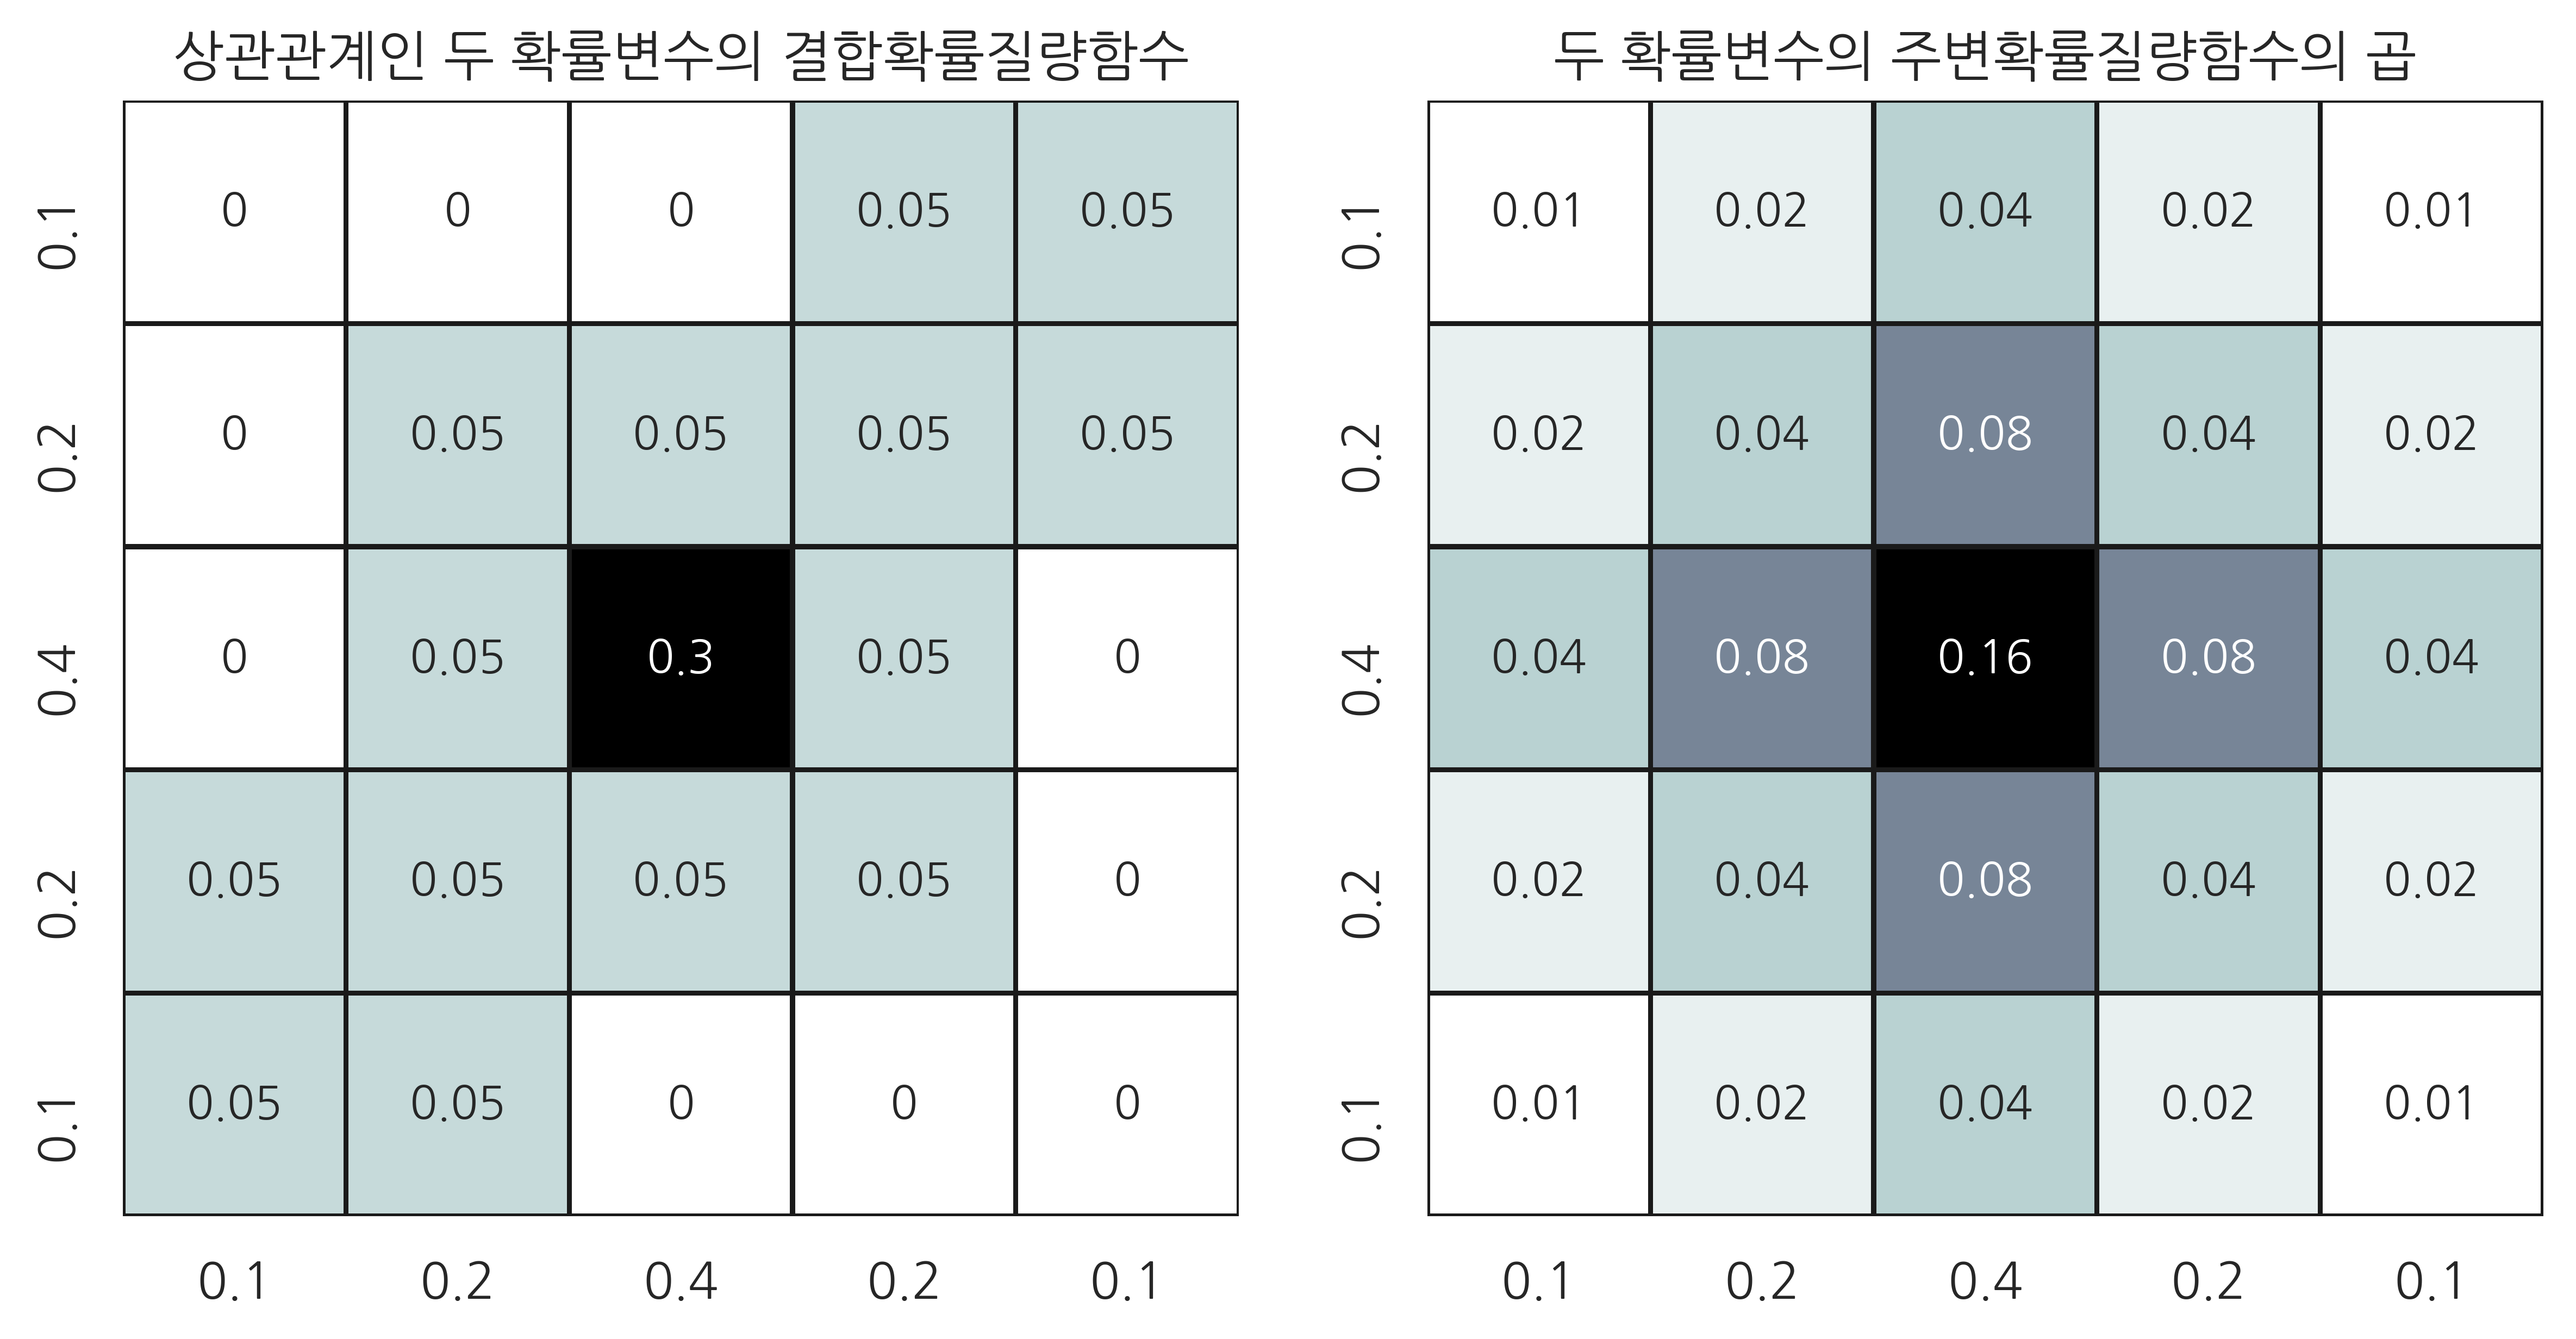

In [35]:
pmf2 = np.array([
    [0, 0, 0, 5, 5],
    [0, 5, 5, 5, 5],
    [0, 5, 30, 5, 0],
    [5, 5, 5, 5, 0],
    [5, 5, 0, 0, 0]])
pmf2 = pmf2 / pmf2.sum()

pmf2_marginal_x = np.round(pmf2.sum(axis=0), 2)
pmf2_marginal_y = np.round(pmf2.sum(axis=1), 2)

plt.subplot(121)
sns.heatmap(pmf2, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor='k', cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title('상관관계인 두 확률변수의 결합확률질량함수')

plt.subplot(122)
pmf2x = pmf2_marginal_x * pmf2_marginal_y[:, np.newaxis]
sns.heatmap(pmf2x, cmap=mpl.cm.bone_r, annot=True, square=True, linewidth=1, linecolor='k', cbar=False, xticklabels=pmf2_marginal_x, yticklabels=pmf2_marginal_y)
plt.title('두 확률변수의 주변확률질량함수의 곱')

plt.tight_layout()
plt.show()

### 7.5 공분산과 상관계수

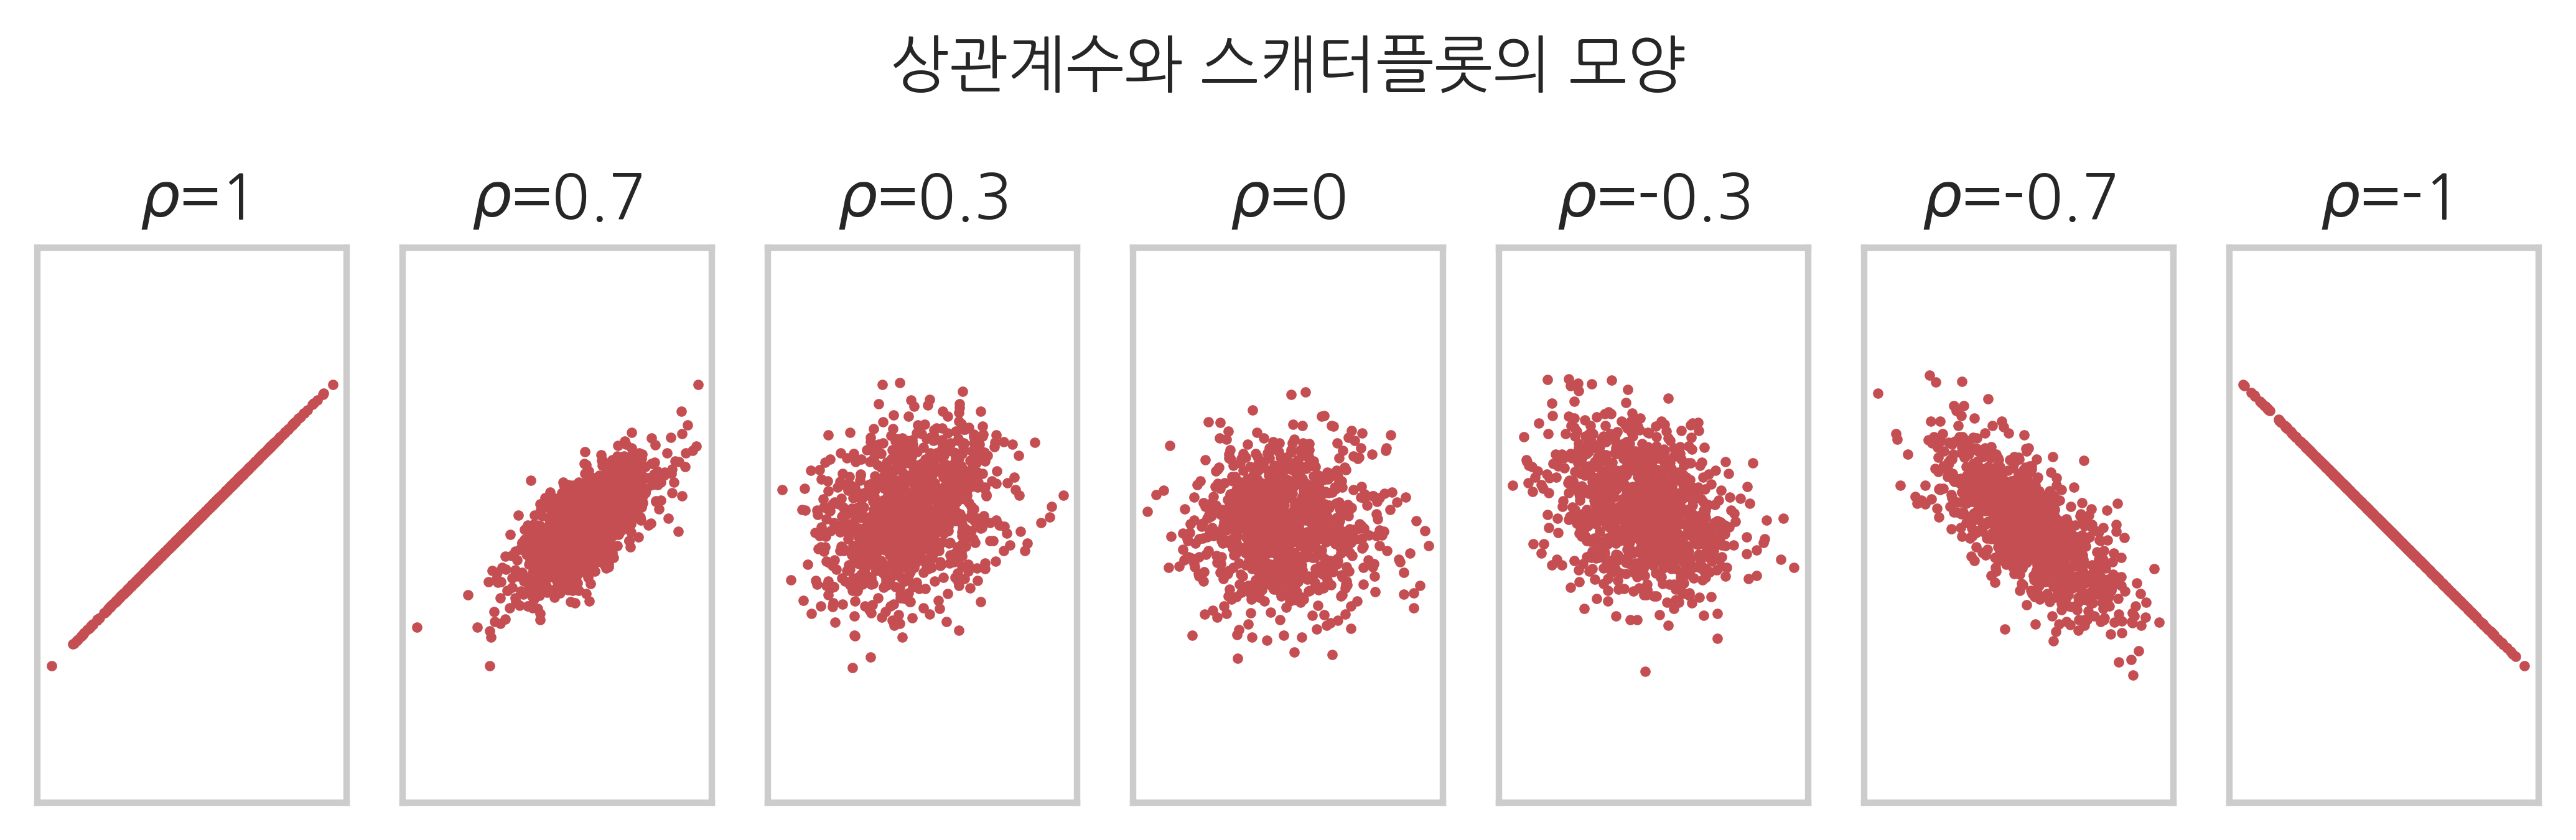

In [39]:
# 상관계수에 따른 스캐터플롯의 모양
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i+1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([]); plt.yticks([])
    plt.title(r'$\rho$={}'.format(r))
plt.suptitle('상관계수와 스캐터플롯의 모양', y=1.1)
plt.tight_layout()
plt.show()

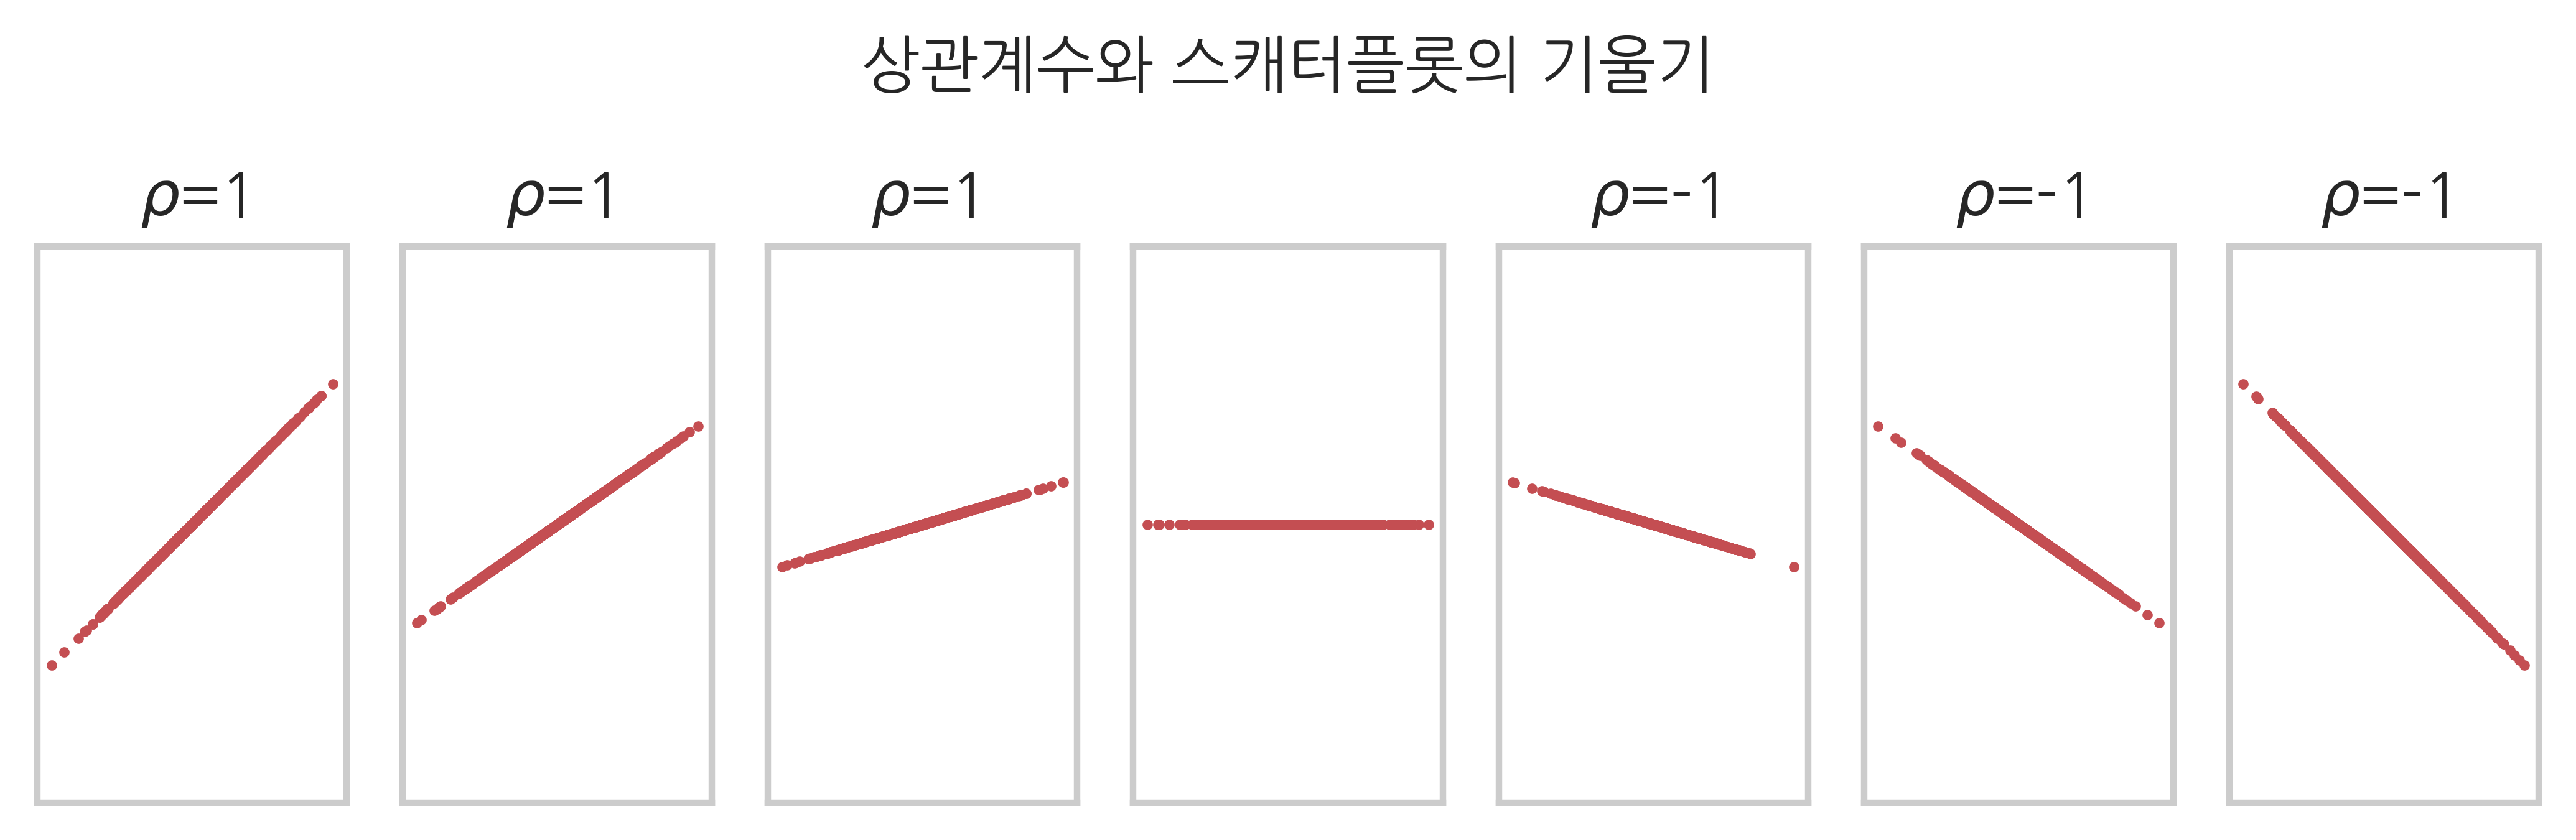

In [42]:
# 상관계수와 스캐터플롯의 기울기는 무관
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 2))
for i, s in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 1000).T
    y2 = s * y
    plt.subplot(1, len(slope), i+1)
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([]); plt.yticks([])
    if s > 0:
        plt.title(r'$\rho$=1')
    if s < 0:
        plt.title(r'$\rho$=-1')
plt.suptitle('상관계수와 스캐터플롯의 기울기', y=1.1)
plt.tight_layout()
plt.show()